<a href="https://colab.research.google.com/github/semesarker/A-Text-Independent-Speech-Emotion-Recognition-Based-on-Convolution-Neural-Network/blob/main/Paper_Implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/thesis/RAV.zip'

Archive:  /content/drive/MyDrive/thesis/RAV.zip
   creating: rav/
   creating: rav/Actor_01/
  inflating: rav/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-03-02-01-01-01.wav  
  infl

In [ ]:
!unzip '/content/drive/MyDrive/thesis/TESS.zip'

Archive:  /content/drive/MyDrive/thesis/TESS.zip
   creating: TESS/
   creating: TESS/OAF_angry/
  inflating: TESS/OAF_angry/OAF_back_angry.wav  
  inflating: TESS/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS/OAF_angry/OAF_base_angry.wav  
  inflating: TESS/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS/OAF_angry/OAF_book_angry.wav  
  inflating: TESS/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS/OAF_angry/OAF_burn_angry.wav  
  inflating: TESS/OAF_angry/OAF_cab_angry.wav  
  inflating: TESS/OAF_angry/OAF_calm_angry.wav  
  inflating: TESS/OAF_angry/OAF_came_angry.wav  
  inflating: TESS/OAF_angry/OAF_cause_angry.wav  
  inflating: TESS/OAF_angry/OAF_chain_angry.wav  
  inflating: TESS/OAF_angry/OAF_chair_angry.wav  
  inflating: TESS/O

In [ ]:
# Keras
#import tensorflow as tf
from IPython.display import Audio
import keras
from keras import regularizers

from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D,MaxPool2D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Conv2D,Conv2DTranspose, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer


from keras_preprocessing.sequence import pad_sequences


# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Other
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import sys
import IPython.display as Audio  # To play sound in the notebook
import warnings

import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os
from tensorflow.keras.optimizers import Adam

# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
Ravdess = '/content/rav'
ravdess_directory_list = os.listdir(Ravdess)
ravdess_directory_list



['Actor_02',
 'Actor_07',
 'Actor_01',
 'Actor_13',
 'Actor_22',
 'Actor_09',
 'Actor_12',
 'Actor_05',
 'Actor_23',
 'Actor_24',
 'Actor_20',
 'Actor_18',
 'Actor_19',
 'Actor_11',
 'Actor_03',
 'Actor_04',
 'Actor_10',
 'Actor_16',
 'Actor_21',
 'Actor_06',
 'Actor_14',
 'Actor_15',
 'Actor_17',
 'Actor_08']

In [ ]:
# Ravdess preprocess
ravdess_directory_list = os.listdir(Ravdess)
file_path = []
file_emotion = []
for directory in ravdess_directory_list:
    # 24 different actors in Ravdess directory needed to be extracted as files for each actor
    actor = os.listdir(Ravdess + '/' + directory)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/' + directory + '/' + file)

In [ ]:
file_path

['/content/rav/Actor_02/03-01-02-01-02-02-02.wav',
 '/content/rav/Actor_02/03-01-01-01-01-02-02.wav',
 '/content/rav/Actor_02/03-01-07-01-02-01-02.wav',
 '/content/rav/Actor_02/03-01-08-02-01-02-02.wav',
 '/content/rav/Actor_02/03-01-03-01-02-02-02.wav',
 '/content/rav/Actor_02/03-01-03-01-02-01-02.wav',
 '/content/rav/Actor_02/03-01-08-01-02-02-02.wav',
 '/content/rav/Actor_02/03-01-06-01-01-01-02.wav',
 '/content/rav/Actor_02/03-01-05-02-02-02-02.wav',
 '/content/rav/Actor_02/03-01-03-02-01-01-02.wav',
 '/content/rav/Actor_02/03-01-05-01-02-01-02.wav',
 '/content/rav/Actor_02/03-01-05-02-02-01-02.wav',
 '/content/rav/Actor_02/03-01-07-02-01-02-02.wav',
 '/content/rav/Actor_02/03-01-08-02-02-01-02.wav',
 '/content/rav/Actor_02/03-01-06-02-01-01-02.wav',
 '/content/rav/Actor_02/03-01-02-02-02-02-02.wav',
 '/content/rav/Actor_02/03-01-08-02-01-01-02.wav',
 '/content/rav/Actor_02/03-01-07-01-01-02-02.wav',
 '/content/rav/Actor_02/03-01-06-01-01-02-02.wav',
 '/content/rav/Actor_02/03-01-0

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# decode integers to actual emotions
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,calm,/content/rav/Actor_02/03-01-02-01-02-02-02.wav
1,neutral,/content/rav/Actor_02/03-01-01-01-01-02-02.wav
2,disgust,/content/rav/Actor_02/03-01-07-01-02-01-02.wav
3,surprise,/content/rav/Actor_02/03-01-08-02-01-02-02.wav
4,happy,/content/rav/Actor_02/03-01-03-01-02-02-02.wav


In [ ]:
Ravdess_df.shape

(1440, 2)

In [ ]:

Tess='/content/TESS'
tess_directory_list = os.listdir(Tess)
tess_directory_list

['YAF_disgust',
 'YAF_sad',
 'YAF_fear',
 'YAF_neutral',
 'OAF_disgust',
 'YAF_angry',
 'YAF_happy',
 'YAF_pleasant_surprised',
 'OAF_neutral',
 'OAF_Sad',
 'OAF_angry',
 'OAF_happy',
 'OAF_Fear',
 'OAF_Pleasant_surprise']

In [ ]:
# TESS preprocess
# increase the data available for surprise emotion
tess_directory_list = os.listdir(Tess)
file_path = []
file_emotion = []
for dir in tess_directory_list:
    directories = os.listdir(Tess +'/'+  dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + '/' + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,disgust,/content/TESS/YAF_disgust/YAF_should_disgust.wav
1,disgust,/content/TESS/YAF_disgust/YAF_chain_disgust.wav
2,disgust,/content/TESS/YAF_disgust/YAF_tough_disgust.wav
3,disgust,/content/TESS/YAF_disgust/YAF_chalk_disgust.wav
4,disgust,/content/TESS/YAF_disgust/YAF_doll_disgust.wav


In [ ]:
Tess_df.shape

(2800, 2)

In [ ]:
data_path = pd.concat([Ravdess_df, Tess_df], axis = 0)
data_path

,Emotions,Path
0,calm,/content/rav/Actor_02/03-01-02-01-02-02-02.wav
1,neutral,/content/rav/Actor_02/03-01-01-01-01-02-02.wav
2,disgust,/content/rav/Actor_02/03-01-07-01-02-01-02.wav
3,surprise,/content/rav/Actor_02/03-01-08-02-01-02-02.wav
4,happy,/content/rav/Actor_02/03-01-03-01-02-02-02.wav
...,...,...
2795,surprise,/content/TESS/OAF_Pleasant_surprise/OAF_hurl_p...
2796,surprise,/content/TESS/OAF_Pleasant_surprise/OAF_yes_ps...
2797,surprise,/content/TESS/OAF_Pleasant_surprise/OAF_mood_p...
2798,surprise,/content/TESS/OAF_Pleasant_surprise/OAF_door_p...


In [ ]:
index = list(np.arange(start=0, stop=4240, step=1))
data_path.index = index

In [ ]:
data_path.reset_index()

,index,Emotions,Path
0,0,calm,/content/rav/Actor_02/03-01-02-01-02-02-02.wav
1,1,neutral,/content/rav/Actor_02/03-01-01-01-01-02-02.wav
2,2,disgust,/content/rav/Actor_02/03-01-07-01-02-01-02.wav
3,3,surprise,/content/rav/Actor_02/03-01-08-02-01-02-02.wav
4,4,happy,/content/rav/Actor_02/03-01-03-01-02-02-02.wav
...,...,...,...
4235,4235,surprise,/content/TESS/OAF_Pleasant_surprise/OAF_hurl_p...
4236,4236,surprise,/content/TESS/OAF_Pleasant_surprise/OAF_yes_ps...
4237,4237,surprise,/content/TESS/OAF_Pleasant_surprise/OAF_mood_p...
4238,4238,surprise,/content/TESS/OAF_Pleasant_surprise/OAF_door_p...


In [ ]:
data_path.drop(['index'],axis=1)

KeyError: ignored

In [ ]:
data_path

,Emotions,Path
0,calm,/content/rav/Actor_02/03-01-02-01-02-02-02.wav
1,neutral,/content/rav/Actor_02/03-01-01-01-01-02-02.wav
2,disgust,/content/rav/Actor_02/03-01-07-01-02-01-02.wav
3,surprise,/content/rav/Actor_02/03-01-08-02-01-02-02.wav
4,happy,/content/rav/Actor_02/03-01-03-01-02-02-02.wav
...,...,...
4235,surprise,/content/TESS/OAF_Pleasant_surprise/OAF_hurl_p...
4236,surprise,/content/TESS/OAF_Pleasant_surprise/OAF_yes_ps...
4237,surprise,/content/TESS/OAF_Pleasant_surprise/OAF_mood_p...
4238,surprise,/content/TESS/OAF_Pleasant_surprise/OAF_door_p...


In [ ]:
data_path.Emotions.value_counts()

disgust     592
surprise    592
happy       592
fear        592
angry       592
sad         592
neutral     496
calm        192
Name: Emotions, dtype: int64

In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
df=np.empty(shape=(data_path.shape[0], 30, 600))

In [ ]:
j = 0
input_length = 16000 * 2.5
for i in tqdm(data_path.Path):
    path = i
    data, sr = librosa.core.load(path, sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')

    if len(data)!= input_length:

        # Random offset / Padding
            data=match_dimension(data,40000)
    # # Random offset / Padding
    # if len(data) > input_length:
    #     max_offset = len(data) - input_length
    #     offset = np.random.randint(max_offset)
    #     data = data[offset:(input_length+offset)]
    # else:
    #     if input_length > len(data):
    #         max_offset = input_length - len(data)
    #         offset = np.random.randint(max_offset)
    #     else:
    #         offset = 0
    #     data = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")


    melspec = librosa.feature.melspectrogram(data,sr=16000,n_mels = 30)
    logspec = librosa.amplitude_to_db(melspec)
    #MFCC = librosa.feature.mfcc(y=wav, sr=sr, n_mfcc=30)
    df[j,0:30,0:logspec.shape[1]] = logspec
    j = j+1
    print(logspec.shape)

  0%|          | 3/4240 [00:00<16:39,  4.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 7/4240 [00:01<07:23,  9.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 11/4240 [00:01<05:10, 13.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 15/4240 [00:01<04:21, 16.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 19/4240 [00:01<03:57, 17.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 23/4240 [00:01<03:51, 18.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 27/4240 [00:02<03:45, 18.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 31/4240 [00:02<03:51, 18.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 36/4240 [00:02<03:37, 19.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

  1%|          | 40/4240 [00:02<03:36, 19.42it/s]


(30, 79)
(30, 79)
(30, 79)


  1%|          | 44/4240 [00:03<03:41, 18.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 46/4240 [00:03<03:46, 18.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 51/4240 [00:03<03:52, 18.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|▏         | 55/4240 [00:03<03:48, 18.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|▏         | 59/4240 [00:03<03:42, 18.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|▏         | 63/4240 [00:04<03:45, 18.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 67/4240 [00:04<03:45, 18.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 71/4240 [00:04<03:51, 18.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 75/4240 [00:04<03:46, 18.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 79/4240 [00:04<03:45, 18.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 83/4240 [00:05<03:44, 18.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 87/4240 [00:05<03:41, 18.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 91/4240 [00:05<03:41, 18.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 95/4240 [00:05<03:39, 18.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 99/4240 [00:06<03:41, 18.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 103/4240 [00:06<03:38, 18.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 107/4240 [00:06<03:42, 18.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 111/4240 [00:06<03:45, 18.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 115/4240 [00:06<03:39, 18.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 119/4240 [00:07<03:39, 18.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 123/4240 [00:07<03:35, 19.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 127/4240 [00:07<03:37, 18.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 131/4240 [00:07<03:35, 19.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 135/4240 [00:07<03:33, 19.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 139/4240 [00:08<03:31, 19.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 143/4240 [00:08<03:32, 19.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 147/4240 [00:08<03:40, 18.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▎         | 151/4240 [00:08<03:38, 18.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▎         | 156/4240 [00:09<03:33, 19.15it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 160/4240 [00:09<03:36, 18.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 164/4240 [00:09<03:33, 19.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 168/4240 [00:09<03:33, 19.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 170/4240 [00:09<03:32, 19.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 177/4240 [00:10<03:31, 19.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 181/4240 [00:10<03:33, 19.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 185/4240 [00:10<03:40, 18.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 189/4240 [00:10<03:37, 18.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 193/4240 [00:10<03:34, 18.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 197/4240 [00:11<03:38, 18.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 201/4240 [00:11<03:33, 18.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 205/4240 [00:11<03:33, 18.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 209/4240 [00:11<03:39, 18.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 213/4240 [00:12<03:37, 18.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 217/4240 [00:12<03:36, 18.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 221/4240 [00:12<03:33, 18.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 225/4240 [00:12<03:34, 18.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 229/4240 [00:12<03:35, 18.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 233/4240 [00:13<03:37, 18.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 237/4240 [00:13<03:33, 18.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 239/4240 [00:13<03:35, 18.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 244/4240 [00:13<03:31, 18.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 248/4240 [00:13<03:31, 18.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 252/4240 [00:14<03:31, 18.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 256/4240 [00:14<03:32, 18.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 261/4240 [00:14<03:24, 19.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▋         | 265/4240 [00:14<03:32, 18.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▋         | 269/4240 [00:15<03:30, 18.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▋         | 273/4240 [00:15<03:28, 18.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 277/4240 [00:15<03:27, 19.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 281/4240 [00:15<03:32, 18.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 285/4240 [00:15<03:39, 18.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 289/4240 [00:16<03:37, 18.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 293/4240 [00:16<03:36, 18.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 297/4240 [00:16<03:31, 18.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 299/4240 [00:16<03:38, 18.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 305/4240 [00:16<03:24, 19.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 309/4240 [00:17<03:33, 18.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 313/4240 [00:17<03:28, 18.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 317/4240 [00:17<03:27, 18.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 321/4240 [00:17<03:27, 18.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 325/4240 [00:18<03:24, 19.15it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 329/4240 [00:18<03:22, 19.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 333/4240 [00:18<03:20, 19.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 338/4240 [00:18<03:19, 19.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 342/4240 [00:18<03:24, 19.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 346/4240 [00:19<03:25, 18.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 350/4240 [00:19<03:25, 18.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 354/4240 [00:19<03:26, 18.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 358/4240 [00:19<03:26, 18.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▊         | 362/4240 [00:20<03:26, 18.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▊         | 366/4240 [00:20<03:25, 18.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▊         | 370/4240 [00:20<03:25, 18.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 374/4240 [00:20<03:21, 19.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 378/4240 [00:20<03:23, 19.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 382/4240 [00:21<03:23, 18.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 386/4240 [00:21<03:21, 19.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 390/4240 [00:21<03:31, 18.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 395/4240 [00:21<03:22, 19.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 399/4240 [00:21<03:26, 18.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 401/4240 [00:22<03:26, 18.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 406/4240 [00:22<03:21, 19.03it/s]

(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 410/4240 [00:22<03:19, 19.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 414/4240 [00:22<03:20, 19.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 418/4240 [00:22<03:27, 18.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 422/4240 [00:23<03:25, 18.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 426/4240 [00:23<03:21, 18.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 430/4240 [00:23<03:19, 19.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 434/4240 [00:23<03:18, 19.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 438/4240 [00:24<03:22, 18.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 442/4240 [00:24<03:21, 18.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 446/4240 [00:24<03:20, 18.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 451/4240 [00:24<03:15, 19.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 11%|█         | 455/4240 [00:24<03:26, 18.30it/s]


(30, 79)
(30, 79)
(30, 79)


 11%|█         | 459/4240 [00:25<03:25, 18.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 463/4240 [00:25<03:23, 18.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 467/4240 [00:25<03:18, 19.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 471/4240 [00:25<03:15, 19.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 475/4240 [00:26<03:27, 18.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█▏        | 479/4240 [00:26<03:27, 18.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█▏        | 483/4240 [00:26<03:20, 18.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█▏        | 487/4240 [00:26<03:18, 18.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 491/4240 [00:26<03:16, 19.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 495/4240 [00:27<03:22, 18.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 499/4240 [00:27<03:30, 17.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 503/4240 [00:27<03:27, 18.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 507/4240 [00:27<03:25, 18.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 511/4240 [00:28<03:37, 17.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 515/4240 [00:28<03:26, 18.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 519/4240 [00:28<03:20, 18.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 523/4240 [00:28<03:19, 18.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 527/4240 [00:28<03:16, 18.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 531/4240 [00:29<03:15, 18.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 535/4240 [00:29<03:13, 19.15it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 539/4240 [00:29<03:17, 18.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 543/4240 [00:29<03:18, 18.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 547/4240 [00:29<03:17, 18.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 551/4240 [00:30<03:18, 18.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 555/4240 [00:30<03:18, 18.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 559/4240 [00:30<03:17, 18.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 563/4240 [00:30<03:18, 18.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 567/4240 [00:31<03:22, 18.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 571/4240 [00:31<03:22, 18.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▎        | 575/4240 [00:31<03:19, 18.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▎        | 579/4240 [00:31<03:17, 18.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 583/4240 [00:31<03:23, 17.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 587/4240 [00:32<03:26, 17.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 591/4240 [00:32<03:22, 18.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 595/4240 [00:32<03:25, 17.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 599/4240 [00:32<03:22, 17.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 603/4240 [00:33<03:21, 18.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 607/4240 [00:33<03:19, 18.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 611/4240 [00:33<03:17, 18.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 615/4240 [00:33<03:17, 18.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 619/4240 [00:33<03:12, 18.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 623/4240 [00:34<03:19, 18.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 627/4240 [00:34<03:16, 18.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 631/4240 [00:34<03:21, 17.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 635/4240 [00:34<03:15, 18.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 640/4240 [00:35<03:08, 19.15it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 644/4240 [00:35<03:13, 18.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 648/4240 [00:35<03:10, 18.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 652/4240 [00:35<03:09, 18.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 656/4240 [00:35<03:16, 18.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 660/4240 [00:36<03:13, 18.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 664/4240 [00:36<03:10, 18.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 668/4240 [00:36<03:15, 18.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 672/4240 [00:36<03:14, 18.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 676/4240 [00:36<03:10, 18.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 680/4240 [00:37<03:14, 18.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 684/4240 [00:37<03:13, 18.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 688/4240 [00:37<03:15, 18.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▋        | 692/4240 [00:37<03:17, 18.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▋        | 696/4240 [00:38<03:08, 18.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 700/4240 [00:38<03:11, 18.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 704/4240 [00:38<03:09, 18.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 708/4240 [00:38<03:09, 18.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 712/4240 [00:38<03:11, 18.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 717/4240 [00:39<03:01, 19.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 721/4240 [00:39<03:02, 19.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 723/4240 [00:39<03:04, 19.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 17%|█▋        | 728/4240 [00:39<03:00, 19.43it/s]


(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 732/4240 [00:39<03:04, 19.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 736/4240 [00:40<03:01, 19.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 740/4240 [00:40<03:07, 18.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 744/4240 [00:40<03:05, 18.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 748/4240 [00:40<03:03, 19.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 752/4240 [00:41<03:04, 18.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 756/4240 [00:41<03:01, 19.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 760/4240 [00:41<03:09, 18.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 764/4240 [00:41<03:09, 18.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 768/4240 [00:41<03:08, 18.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 772/4240 [00:42<03:08, 18.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 776/4240 [00:42<03:06, 18.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 780/4240 [00:42<03:08, 18.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 784/4240 [00:42<03:04, 18.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▊        | 788/4240 [00:43<03:12, 17.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▊        | 792/4240 [00:43<03:10, 18.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 796/4240 [00:43<03:08, 18.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 800/4240 [00:43<03:02, 18.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 805/4240 [00:43<02:54, 19.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 809/4240 [00:44<02:57, 19.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 813/4240 [00:44<02:55, 19.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 818/4240 [00:44<02:58, 19.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 823/4240 [00:44<02:57, 19.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 827/4240 [00:45<03:02, 18.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 831/4240 [00:45<03:04, 18.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 835/4240 [00:45<03:02, 18.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 839/4240 [00:45<02:58, 19.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 843/4240 [00:45<02:58, 19.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 847/4240 [00:46<02:57, 19.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 851/4240 [00:46<02:56, 19.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 855/4240 [00:46<03:00, 18.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 859/4240 [00:46<02:56, 19.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 864/4240 [00:47<02:52, 19.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 868/4240 [00:47<02:54, 19.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 872/4240 [00:47<02:55, 19.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 877/4240 [00:47<02:55, 19.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 882/4240 [00:47<02:51, 19.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 886/4240 [00:48<02:54, 19.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 890/4240 [00:48<02:55, 19.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 892/4240 [00:48<03:00, 18.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 897/4240 [00:48<02:54, 19.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██▏       | 901/4240 [00:48<02:54, 19.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██▏       | 905/4240 [00:49<02:55, 19.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██▏       | 909/4240 [00:49<02:59, 18.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 913/4240 [00:49<03:03, 18.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 917/4240 [00:49<03:04, 17.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 921/4240 [00:50<03:01, 18.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 926/4240 [00:50<02:52, 19.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 930/4240 [00:50<02:52, 19.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 934/4240 [00:50<02:52, 19.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 938/4240 [00:50<02:54, 18.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 942/4240 [00:51<03:01, 18.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 946/4240 [00:51<03:05, 17.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 950/4240 [00:51<03:11, 17.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▎       | 954/4240 [00:51<03:04, 17.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 958/4240 [00:52<03:06, 17.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 962/4240 [00:52<03:00, 18.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 966/4240 [00:52<03:06, 17.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 970/4240 [00:52<03:02, 17.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 974/4240 [00:53<03:04, 17.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 978/4240 [00:53<02:58, 18.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 982/4240 [00:53<02:59, 18.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 986/4240 [00:53<03:02, 17.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 990/4240 [00:53<03:00, 17.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 994/4240 [00:54<02:56, 18.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▎       | 998/4240 [00:54<02:53, 18.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▎       | 1002/4240 [00:54<02:53, 18.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▎       | 1006/4240 [00:54<02:55, 18.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1010/4240 [00:54<02:55, 18.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1015/4240 [00:55<02:48, 19.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1019/4240 [00:55<02:53, 18.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1023/4240 [00:55<02:54, 18.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1027/4240 [00:55<02:55, 18.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1031/4240 [00:56<02:55, 18.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1035/4240 [00:56<02:54, 18.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1039/4240 [00:56<02:52, 18.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1043/4240 [00:56<02:56, 18.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1048/4240 [00:57<02:47, 19.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1052/4240 [00:57<02:47, 19.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1056/4240 [00:57<02:57, 17.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1060/4240 [00:57<02:59, 17.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1064/4240 [00:57<03:05, 17.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1066/4240 [00:58<03:02, 17.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1071/4240 [00:58<02:52, 18.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1075/4240 [00:58<02:48, 18.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1080/4240 [00:58<02:50, 18.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1084/4240 [00:59<02:47, 18.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1088/4240 [00:59<02:47, 18.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1092/4240 [00:59<02:44, 19.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1094/4240 [00:59<02:47, 18.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1101/4240 [00:59<02:46, 18.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1106/4240 [01:00<02:40, 19.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1110/4240 [01:00<02:43, 19.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▋       | 1114/4240 [01:00<02:42, 19.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▋       | 1118/4240 [01:00<02:44, 18.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▋       | 1122/4240 [01:01<02:47, 18.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1126/4240 [01:01<02:44, 18.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1130/4240 [01:01<02:43, 18.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1134/4240 [01:01<02:47, 18.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1138/4240 [01:01<02:47, 18.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1142/4240 [01:02<02:47, 18.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1146/4240 [01:02<02:42, 18.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1150/4240 [01:02<02:42, 18.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1154/4240 [01:02<02:41, 19.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1158/4240 [01:02<02:44, 18.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1162/4240 [01:03<02:42, 18.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1166/4240 [01:03<02:41, 19.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1170/4240 [01:03<02:42, 18.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1174/4240 [01:03<02:45, 18.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1178/4240 [01:04<02:46, 18.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1182/4240 [01:04<02:47, 18.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1186/4240 [01:04<02:45, 18.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1190/4240 [01:04<02:43, 18.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1194/4240 [01:04<02:41, 18.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1199/4240 [01:05<02:37, 19.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1203/4240 [01:05<02:40, 18.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1207/4240 [01:05<02:41, 18.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▊       | 1211/4240 [01:05<02:38, 19.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▊       | 1215/4240 [01:05<02:41, 18.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1219/4240 [01:06<02:40, 18.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1223/4240 [01:06<02:40, 18.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1227/4240 [01:06<02:42, 18.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1231/4240 [01:06<02:37, 19.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1235/4240 [01:07<02:45, 18.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1239/4240 [01:07<02:43, 18.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1243/4240 [01:07<02:46, 18.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1247/4240 [01:07<02:41, 18.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1251/4240 [01:07<02:37, 18.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1255/4240 [01:08<02:42, 18.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1259/4240 [01:08<02:39, 18.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1263/4240 [01:08<02:38, 18.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1268/4240 [01:08<02:32, 19.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1272/4240 [01:09<02:37, 18.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1277/4240 [01:09<02:34, 19.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1281/4240 [01:09<02:36, 18.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1285/4240 [01:09<02:39, 18.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1289/4240 [01:09<02:44, 17.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1293/4240 [01:10<02:53, 16.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1297/4240 [01:10<02:48, 17.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1301/4240 [01:10<02:45, 17.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1305/4240 [01:10<02:39, 18.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1309/4240 [01:11<02:41, 18.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1313/4240 [01:11<02:38, 18.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1317/4240 [01:11<02:44, 17.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1322/4240 [01:11<02:37, 18.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███▏      | 1327/4240 [01:12<02:32, 19.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███▏      | 1331/4240 [01:12<02:30, 19.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███▏      | 1335/4240 [01:12<02:30, 19.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1340/4240 [01:12<02:25, 19.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1344/4240 [01:12<02:26, 19.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1348/4240 [01:13<02:32, 19.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1352/4240 [01:13<02:32, 18.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1356/4240 [01:13<02:32, 18.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1360/4240 [01:13<02:30, 19.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1364/4240 [01:14<02:35, 18.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1366/4240 [01:14<02:39, 17.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1371/4240 [01:14<02:30, 19.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1375/4240 [01:14<02:33, 18.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1379/4240 [01:14<02:32, 18.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1383/4240 [01:15<02:32, 18.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1388/4240 [01:15<02:30, 18.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1392/4240 [01:15<02:31, 18.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1396/4240 [01:15<02:34, 18.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1400/4240 [01:15<02:39, 17.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1404/4240 [01:16<02:40, 17.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1408/4240 [01:16<02:32, 18.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1412/4240 [01:16<02:31, 18.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1416/4240 [01:16<02:28, 19.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1420/4240 [01:17<02:28, 18.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▎      | 1424/4240 [01:17<02:33, 18.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▎      | 1428/4240 [01:17<02:31, 18.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1432/4240 [01:17<02:32, 18.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1436/4240 [01:17<02:29, 18.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1441/4240 [01:18<02:15, 20.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1450/4240 [01:18<01:29, 31.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1459/4240 [01:18<01:15, 36.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 35%|███▍      | 1469/4240 [01:18<01:08, 40.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 35%|███▍      | 1479/4240 [01:19<01:05, 42.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 35%|███▌      | 1484/4240 [01:19<01:04, 42.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 35%|███▌      | 1494/4240 [01:19<01:06, 41.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 35%|███▌      | 1504/4240 [01:19<01:05, 42.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 36%|███▌      | 1514/4240 [01:19<01:04, 42.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 36%|███▌      | 1524/4240 [01:20<01:03, 42.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 36%|███▌      | 1529/4240 [01:20<01:03, 42.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 36%|███▋      | 1539/4240 [01:20<01:04, 41.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 37%|███▋      | 1549/4240 [01:20<01:02, 43.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 37%|███▋      | 1559/4240 [01:20<01:02, 42.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 37%|███▋      | 1569/4240 [01:21<01:01, 43.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 37%|███▋      | 1579/4240 [01:21<01:02, 42.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 37%|███▋      | 1584/4240 [01:21<01:03, 41.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 38%|███▊      | 1594/4240 [01:21<01:01, 43.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 38%|███▊      | 1604/4240 [01:21<01:00, 43.62it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 38%|███▊      | 1614/4240 [01:22<01:00, 43.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 38%|███▊      | 1624/4240 [01:22<01:02, 42.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 38%|███▊      | 1629/4240 [01:22<01:01, 42.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 39%|███▊      | 1639/4240 [01:22<01:00, 43.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 39%|███▉      | 1649/4240 [01:23<00:58, 44.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 39%|███▉      | 1659/4240 [01:23<00:56, 45.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 39%|███▉      | 1669/4240 [01:23<00:59, 43.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 40%|███▉      | 1679/4240 [01:23<00:58, 43.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 40%|███▉      | 1689/4240 [01:23<00:58, 43.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 40%|████      | 1699/4240 [01:24<00:56, 44.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 40%|████      | 1709/4240 [01:24<00:58, 43.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 40%|████      | 1714/4240 [01:24<00:59, 42.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 41%|████      | 1724/4240 [01:24<00:57, 43.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 41%|████      | 1734/4240 [01:24<00:57, 43.80it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 41%|████      | 1744/4240 [01:25<00:56, 44.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 41%|████▏     | 1754/4240 [01:25<00:59, 41.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 41%|████▏     | 1759/4240 [01:25<00:58, 42.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 42%|████▏     | 1769/4240 [01:25<00:57, 42.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 42%|████▏     | 1779/4240 [01:26<00:55, 44.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 42%|████▏     | 1789/4240 [01:26<00:56, 43.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 42%|████▏     | 1799/4240 [01:26<00:57, 42.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 43%|████▎     | 1809/4240 [01:26<00:57, 42.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 43%|████▎     | 1819/4240 [01:26<00:55, 43.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 43%|████▎     | 1824/4240 [01:27<00:57, 42.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 43%|████▎     | 1834/4240 [01:27<00:56, 42.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 43%|████▎     | 1844/4240 [01:27<01:01, 39.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 44%|████▎     | 1852/4240 [01:27<01:04, 37.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 44%|████▍     | 1860/4240 [01:28<01:06, 35.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 44%|████▍     | 1864/4240 [01:28<01:08, 34.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 44%|████▍     | 1872/4240 [01:28<01:10, 33.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 44%|████▍     | 1880/4240 [01:28<01:10, 33.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▍     | 1888/4240 [01:28<01:09, 33.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▍     | 1896/4240 [01:29<01:12, 32.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▍     | 1904/4240 [01:29<01:09, 33.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▌     | 1908/4240 [01:29<01:12, 32.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▌     | 1916/4240 [01:29<01:11, 32.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▌     | 1924/4240 [01:29<01:08, 33.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 46%|████▌     | 1932/4240 [01:30<01:06, 34.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 46%|████▌     | 1940/4240 [01:30<01:07, 34.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 46%|████▌     | 1948/4240 [01:30<01:08, 33.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 46%|████▌     | 1956/4240 [01:30<01:07, 33.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 46%|████▌     | 1960/4240 [01:31<01:07, 33.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 46%|████▋     | 1968/4240 [01:31<01:07, 33.58it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 47%|████▋     | 1976/4240 [01:31<01:07, 33.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 47%|████▋     | 1984/4240 [01:31<01:11, 31.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 47%|████▋     | 1988/4240 [01:31<01:11, 31.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 47%|████▋     | 1996/4240 [01:32<01:11, 31.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 47%|████▋     | 2004/4240 [01:32<01:07, 33.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 47%|████▋     | 2012/4240 [01:32<01:08, 32.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 48%|████▊     | 2020/4240 [01:32<01:06, 33.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 48%|████▊     | 2024/4240 [01:33<01:07, 32.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 48%|████▊     | 2032/4240 [01:33<01:07, 32.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 48%|████▊     | 2040/4240 [01:33<01:06, 32.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 48%|████▊     | 2048/4240 [01:33<01:05, 33.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 48%|████▊     | 2056/4240 [01:33<01:04, 34.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 49%|████▊     | 2064/4240 [01:34<01:02, 34.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 49%|████▉     | 2072/4240 [01:34<01:01, 35.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 49%|████▉     | 2080/4240 [01:34<00:59, 36.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 49%|████▉     | 2084/4240 [01:34<01:01, 35.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 49%|████▉     | 2092/4240 [01:35<01:02, 34.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 50%|████▉     | 2100/4240 [01:35<01:01, 34.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 50%|████▉     | 2108/4240 [01:35<01:01, 34.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 50%|████▉     | 2116/4240 [01:35<01:02, 33.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 50%|█████     | 2124/4240 [01:35<01:01, 34.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 50%|█████     | 2132/4240 [01:36<01:00, 34.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 50%|█████     | 2140/4240 [01:36<00:59, 35.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 51%|█████     | 2148/4240 [01:36<00:57, 36.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 51%|█████     | 2156/4240 [01:36<01:00, 34.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 51%|█████     | 2164/4240 [01:37<00:59, 35.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 51%|█████     | 2168/4240 [01:37<01:01, 33.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 51%|█████▏    | 2176/4240 [01:37<00:59, 34.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 52%|█████▏    | 2184/4240 [01:37<01:01, 33.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 52%|█████▏    | 2192/4240 [01:37<01:00, 33.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 52%|█████▏    | 2200/4240 [01:38<00:57, 35.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 52%|█████▏    | 2208/4240 [01:38<00:55, 36.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 52%|█████▏    | 2216/4240 [01:38<00:57, 35.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 52%|█████▏    | 2220/4240 [01:38<01:03, 31.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 53%|█████▎    | 2228/4240 [01:38<01:00, 33.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 53%|█████▎    | 2236/4240 [01:39<00:57, 35.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 53%|█████▎    | 2246/4240 [01:39<00:49, 40.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 53%|█████▎    | 2257/4240 [01:39<00:43, 46.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 54%|█████▎    | 2269/4240 [01:39<00:40, 48.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 54%|█████▍    | 2281/4240 [01:40<00:38, 51.47it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 54%|█████▍    | 2293/4240 [01:40<00:36, 53.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 54%|█████▍    | 2305/4240 [01:40<00:36, 52.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 55%|█████▍    | 2317/4240 [01:40<00:35, 53.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 55%|█████▍    | 2329/4240 [01:41<00:36, 51.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 55%|█████▌    | 2341/4240 [01:41<00:35, 53.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 55%|█████▌    | 2347/4240 [01:41<00:35, 53.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 56%|█████▌    | 2359/4240 [01:41<00:35, 52.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 56%|█████▌    | 2371/4240 [01:41<00:37, 50.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 56%|█████▌    | 2383/4240 [01:42<00:36, 50.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 56%|█████▋    | 2395/4240 [01:42<00:35, 52.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 57%|█████▋    | 2401/4240 [01:42<00:35, 52.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 57%|█████▋    | 2413/4240 [01:42<00:34, 52.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 57%|█████▋    | 2425/4240 [01:42<00:35, 50.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 57%|█████▋    | 2437/4240 [01:43<00:35, 50.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 58%|█████▊    | 2448/4240 [01:43<00:37, 47.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 58%|█████▊    | 2453/4240 [01:43<00:40, 44.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 58%|█████▊    | 2463/4240 [01:43<00:42, 41.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 58%|█████▊    | 2473/4240 [01:44<00:43, 40.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 59%|█████▊    | 2483/4240 [01:44<00:41, 42.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 59%|█████▊    | 2488/4240 [01:44<00:41, 41.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 59%|█████▉    | 2498/4240 [01:44<00:40, 42.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 59%|█████▉    | 2508/4240 [01:44<00:40, 42.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 59%|█████▉    | 2518/4240 [01:45<00:41, 41.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 60%|█████▉    | 2528/4240 [01:45<00:41, 41.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 60%|█████▉    | 2533/4240 [01:45<00:42, 40.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 60%|█████▉    | 2543/4240 [01:45<00:41, 40.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 60%|██████    | 2553/4240 [01:45<00:42, 39.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 60%|██████    | 2561/4240 [01:46<00:42, 39.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 61%|██████    | 2571/4240 [01:46<00:40, 40.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 61%|██████    | 2581/4240 [01:46<00:40, 40.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 61%|██████    | 2586/4240 [01:46<00:39, 41.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 61%|██████    | 2596/4240 [01:47<00:40, 40.93it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 61%|██████▏   | 2606/4240 [01:47<00:40, 40.51it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 62%|██████▏   | 2611/4240 [01:47<00:41, 39.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 62%|██████▏   | 2620/4240 [01:47<00:41, 38.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 62%|██████▏   | 2628/4240 [01:47<00:41, 38.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 62%|██████▏   | 2636/4240 [01:48<00:42, 37.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 62%|██████▏   | 2644/4240 [01:48<00:43, 37.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 63%|██████▎   | 2652/4240 [01:48<00:41, 38.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 63%|██████▎   | 2660/4240 [01:48<00:43, 36.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 63%|██████▎   | 2668/4240 [01:48<00:43, 36.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 63%|██████▎   | 2677/4240 [01:49<00:41, 37.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 63%|██████▎   | 2686/4240 [01:49<00:40, 38.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 64%|██████▎   | 2695/4240 [01:49<00:40, 38.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 64%|██████▍   | 2703/4240 [01:49<00:39, 38.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 64%|██████▍   | 2711/4240 [01:50<00:40, 37.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 64%|██████▍   | 2719/4240 [01:50<00:40, 37.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 64%|██████▍   | 2728/4240 [01:50<00:38, 39.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▍   | 2736/4240 [01:50<00:40, 37.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▍   | 2745/4240 [01:50<00:38, 38.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▍   | 2753/4240 [01:51<00:41, 36.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▌   | 2761/4240 [01:51<00:42, 34.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▌   | 2769/4240 [01:51<00:41, 35.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▌   | 2777/4240 [01:51<00:40, 36.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▌   | 2785/4240 [01:52<00:39, 36.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▌   | 2793/4240 [01:52<00:39, 36.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▌   | 2802/4240 [01:52<00:37, 37.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▋   | 2810/4240 [01:52<00:37, 37.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▋   | 2818/4240 [01:53<00:38, 36.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 67%|██████▋   | 2822/4240 [01:53<00:40, 34.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 67%|██████▋   | 2831/4240 [01:53<00:38, 36.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 67%|██████▋   | 2839/4240 [01:53<00:37, 37.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 67%|██████▋   | 2849/4240 [01:53<00:35, 39.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 67%|██████▋   | 2858/4240 [01:54<00:34, 39.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 68%|██████▊   | 2867/4240 [01:54<00:34, 40.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 68%|██████▊   | 2877/4240 [01:54<00:32, 41.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 68%|██████▊   | 2887/4240 [01:54<00:33, 40.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 68%|██████▊   | 2892/4240 [01:54<00:34, 39.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 68%|██████▊   | 2901/4240 [01:55<00:34, 39.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 69%|██████▊   | 2909/4240 [01:55<00:35, 37.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 69%|██████▉   | 2918/4240 [01:55<00:33, 39.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 69%|██████▉   | 2927/4240 [01:55<00:31, 41.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 69%|██████▉   | 2937/4240 [01:56<00:30, 42.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 70%|██████▉   | 2947/4240 [01:56<00:30, 42.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 70%|██████▉   | 2957/4240 [01:56<00:30, 42.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 70%|██████▉   | 2967/4240 [01:56<00:31, 40.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 70%|███████   | 2977/4240 [01:56<00:29, 42.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 70%|███████   | 2982/4240 [01:57<00:30, 40.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 71%|███████   | 2992/4240 [01:57<00:29, 42.15it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 71%|███████   | 3002/4240 [01:57<00:29, 42.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 71%|███████   | 3012/4240 [01:57<00:28, 43.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 71%|███████▏  | 3022/4240 [01:58<00:28, 42.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 72%|███████▏  | 3032/4240 [01:58<00:29, 40.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 72%|███████▏  | 3037/4240 [01:58<00:29, 41.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 72%|███████▏  | 3047/4240 [01:58<00:28, 42.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 72%|███████▏  | 3057/4240 [01:58<00:28, 41.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 72%|███████▏  | 3067/4240 [01:59<00:28, 41.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 73%|███████▎  | 3077/4240 [01:59<00:28, 40.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 73%|███████▎  | 3082/4240 [01:59<00:28, 40.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 73%|███████▎  | 3092/4240 [01:59<00:28, 40.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 73%|███████▎  | 3102/4240 [01:59<00:27, 41.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 73%|███████▎  | 3112/4240 [02:00<00:25, 44.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 74%|███████▎  | 3122/4240 [02:00<00:27, 41.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 74%|███████▍  | 3132/4240 [02:00<00:25, 42.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 74%|███████▍  | 3142/4240 [02:00<00:25, 43.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 74%|███████▍  | 3152/4240 [02:01<00:25, 42.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 74%|███████▍  | 3157/4240 [02:01<00:26, 41.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 75%|███████▍  | 3167/4240 [02:01<00:26, 41.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 75%|███████▍  | 3177/4240 [02:01<00:25, 41.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 75%|███████▌  | 3187/4240 [02:01<00:24, 42.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 75%|███████▌  | 3197/4240 [02:02<00:24, 42.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 76%|███████▌  | 3202/4240 [02:02<00:24, 41.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 76%|███████▌  | 3212/4240 [02:02<00:24, 42.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 76%|███████▌  | 3222/4240 [02:02<00:24, 42.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 76%|███████▌  | 3232/4240 [02:03<00:24, 40.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 76%|███████▋  | 3242/4240 [02:03<00:23, 41.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 77%|███████▋  | 3253/4240 [02:03<00:21, 46.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 77%|███████▋  | 3265/4240 [02:03<00:19, 50.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 77%|███████▋  | 3271/4240 [02:03<00:19, 50.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 77%|███████▋  | 3283/4240 [02:04<00:18, 51.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 78%|███████▊  | 3295/4240 [02:04<00:18, 52.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 78%|███████▊  | 3307/4240 [02:04<00:18, 49.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 78%|███████▊  | 3317/4240 [02:04<00:18, 48.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 78%|███████▊  | 3328/4240 [02:05<00:18, 49.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 79%|███████▉  | 3339/4240 [02:05<00:17, 50.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 79%|███████▉  | 3345/4240 [02:05<00:20, 44.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 79%|███████▉  | 3356/4240 [02:05<00:18, 46.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 79%|███████▉  | 3367/4240 [02:05<00:17, 49.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 80%|███████▉  | 3378/4240 [02:06<00:16, 50.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 80%|███████▉  | 3390/4240 [02:06<00:16, 50.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 80%|████████  | 3402/4240 [02:06<00:16, 49.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 80%|████████  | 3412/4240 [02:06<00:16, 48.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 81%|████████  | 3417/4240 [02:06<00:17, 45.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 81%|████████  | 3428/4240 [02:07<00:17, 46.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 81%|████████  | 3440/4240 [02:07<00:15, 50.15it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 81%|████████▏ | 3451/4240 [02:07<00:17, 45.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 82%|████████▏ | 3461/4240 [02:07<00:17, 43.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 82%|████████▏ | 3471/4240 [02:08<00:18, 41.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 82%|████████▏ | 3476/4240 [02:08<00:19, 40.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 82%|████████▏ | 3486/4240 [02:08<00:18, 40.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 82%|████████▏ | 3496/4240 [02:08<00:18, 40.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 83%|████████▎ | 3506/4240 [02:08<00:17, 41.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 83%|████████▎ | 3511/4240 [02:09<00:17, 40.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 83%|████████▎ | 3521/4240 [02:09<00:17, 41.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 83%|████████▎ | 3531/4240 [02:09<00:16, 41.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 84%|████████▎ | 3541/4240 [02:09<00:17, 40.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 84%|████████▎ | 3546/4240 [02:09<00:18, 38.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 84%|████████▍ | 3555/4240 [02:10<00:17, 38.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 84%|████████▍ | 3564/4240 [02:10<00:17, 38.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 84%|████████▍ | 3572/4240 [02:10<00:17, 38.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 84%|████████▍ | 3581/4240 [02:10<00:16, 39.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 85%|████████▍ | 3591/4240 [02:11<00:15, 40.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 85%|████████▍ | 3596/4240 [02:11<00:15, 41.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 85%|████████▌ | 3606/4240 [02:11<00:15, 40.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 85%|████████▌ | 3616/4240 [02:11<00:15, 40.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 85%|████████▌ | 3625/4240 [02:11<00:15, 39.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 86%|████████▌ | 3633/4240 [02:12<00:15, 38.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 86%|████████▌ | 3641/4240 [02:12<00:15, 38.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 86%|████████▌ | 3650/4240 [02:12<00:15, 38.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 86%|████████▋ | 3658/4240 [02:12<00:15, 36.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 86%|████████▋ | 3666/4240 [02:13<00:16, 35.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 87%|████████▋ | 3674/4240 [02:13<00:16, 35.08it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 87%|████████▋ | 3682/4240 [02:13<00:15, 35.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 87%|████████▋ | 3690/4240 [02:13<00:14, 36.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 87%|████████▋ | 3695/4240 [02:13<00:14, 38.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 87%|████████▋ | 3705/4240 [02:14<00:13, 39.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 88%|████████▊ | 3713/4240 [02:14<00:14, 37.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 88%|████████▊ | 3721/4240 [02:14<00:14, 36.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 88%|████████▊ | 3729/4240 [02:14<00:14, 35.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 88%|████████▊ | 3737/4240 [02:15<00:14, 35.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 88%|████████▊ | 3745/4240 [02:15<00:13, 36.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 89%|████████▊ | 3753/4240 [02:15<00:13, 37.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 89%|████████▊ | 3761/4240 [02:15<00:13, 35.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 89%|████████▉ | 3765/4240 [02:15<00:13, 34.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 89%|████████▉ | 3773/4240 [02:16<00:14, 33.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 89%|████████▉ | 3781/4240 [02:16<00:13, 33.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 89%|████████▉ | 3789/4240 [02:16<00:12, 34.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 90%|████████▉ | 3798/4240 [02:16<00:12, 36.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 90%|████████▉ | 3806/4240 [02:16<00:11, 36.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 90%|████████▉ | 3814/4240 [02:17<00:11, 36.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 90%|█████████ | 3822/4240 [02:17<00:11, 37.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 90%|█████████ | 3830/4240 [02:17<00:10, 37.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 91%|█████████ | 3838/4240 [02:17<00:10, 37.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 91%|█████████ | 3846/4240 [02:18<00:10, 37.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 91%|█████████ | 3854/4240 [02:18<00:10, 36.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 91%|█████████ | 3862/4240 [02:18<00:10, 36.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 91%|█████████▏| 3870/4240 [02:18<00:10, 35.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 91%|█████████▏| 3878/4240 [02:18<00:10, 33.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▏| 3882/4240 [02:19<00:11, 32.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▏| 3890/4240 [02:19<00:10, 33.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▏| 3898/4240 [02:19<00:10, 33.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▏| 3906/4240 [02:19<00:10, 32.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▏| 3914/4240 [02:20<00:10, 32.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▎| 3922/4240 [02:20<00:09, 32.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 93%|█████████▎| 3930/4240 [02:20<00:09, 33.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 93%|█████████▎| 3938/4240 [02:20<00:08, 35.25it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 93%|█████████▎| 3942/4240 [02:20<00:08, 34.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 93%|█████████▎| 3950/4240 [02:21<00:08, 33.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 93%|█████████▎| 3958/4240 [02:21<00:08, 33.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▎| 3966/4240 [02:21<00:08, 32.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▎| 3970/4240 [02:21<00:08, 31.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▍| 3978/4240 [02:22<00:08, 31.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▍| 3986/4240 [02:22<00:07, 32.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▍| 3994/4240 [02:22<00:07, 32.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▍| 4002/4240 [02:22<00:06, 34.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▍| 4006/4240 [02:22<00:07, 31.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 95%|█████████▍| 4014/4240 [02:23<00:07, 31.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 95%|█████████▍| 4022/4240 [02:23<00:06, 32.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 95%|█████████▌| 4030/4240 [02:23<00:06, 32.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 95%|█████████▌| 4034/4240 [02:23<00:06, 31.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 95%|█████████▌| 4042/4240 [02:24<00:06, 31.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 96%|█████████▌| 4052/4240 [02:24<00:04, 38.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 96%|█████████▌| 4062/4240 [02:24<00:04, 42.24it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 96%|█████████▌| 4072/4240 [02:24<00:03, 43.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 96%|█████████▋| 4083/4240 [02:24<00:03, 46.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 97%|█████████▋| 4093/4240 [02:25<00:03, 45.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 97%|█████████▋| 4103/4240 [02:25<00:03, 42.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 97%|█████████▋| 4113/4240 [02:25<00:02, 45.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 97%|█████████▋| 4123/4240 [02:25<00:02, 46.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 97%|█████████▋| 4133/4240 [02:26<00:02, 46.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 98%|█████████▊| 4143/4240 [02:26<00:02, 45.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 98%|█████████▊| 4153/4240 [02:26<00:01, 45.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 98%|█████████▊| 4164/4240 [02:26<00:01, 47.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 98%|█████████▊| 4174/4240 [02:26<00:01, 46.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 99%|█████████▊| 4179/4240 [02:27<00:01, 44.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 99%|█████████▉| 4189/4240 [02:27<00:01, 44.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 99%|█████████▉| 4199/4240 [02:27<00:00, 46.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 99%|█████████▉| 4210/4240 [02:27<00:00, 47.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


100%|█████████▉| 4220/4240 [02:27<00:00, 47.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


100%|█████████▉| 4230/4240 [02:28<00:00, 47.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

100%|██████████| 4240/4240 [02:28<00:00, 28.58it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
sampling_rate=16000
audio_duration=2.5
n_mfcc = 30
n_melspec = 30
n_fft=512
def prepare_data(df, n, mfcc ,mel):
    X = np.empty(shape=(df.shape[0], n,158,1))
    input_length = sampling_rate * audio_duration

    cnt = 0
    for fname in tqdm(df.Path):
        file_path = fname
        data, sr = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        if len(data)!= input_length:

        # Random offset / Padding
            data=match_dimension(data,40000)




          # which feature?
          # if mfcc == 1:
          #       # MFCC extraction
          #   MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
          #   MFCC = np.expand_dims(MFCC, axis=-1)
          #   X[cnt,] = MFCC
          #   print('mfcc',MFCC.shape)

        if mfcc == 1 and mel== 0:
                  # MFCC extraction
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              MFCC = np.expand_dims(MFCC, axis=-1)
              X[cnt,] = MFCC
              print('mfcc',MFCC.shape)

        elif mfcc==0 and mel==1 :
                  # Log-melspectogram

              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_mels = n_melspec)
              logspec = librosa.amplitude_to_db(melspec)
              logspec = np.expand_dims(logspec, axis=-1)
              X[cnt,] = logspec

              print('mel',logspec.shape)

        elif mfcc==1 and mel== 1:
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_mels = n_melspec)
              logspec = librosa.amplitude_to_db(melspec)
              mfcc_logspec= np.concatenate((MFCC,logspec),axis=1)
              #mel_logspec= np.vstack([MFCC,logspec])
              #print(mfcc_logspec.shape)
              mfcc_logspec = np.expand_dims(mfcc_logspec, axis=-1)
              X[cnt,] = mfcc_logspec
              print('mfcc_logspec',mfcc_logspec.shape)

        cnt += 1

    return X

In [ ]:
mel_s=prepare_data(data_path,n=30,mfcc=1,mel=1)

  0%|          | 3/4240 [00:00<16:48,  4.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 7/4240 [00:01<07:52,  8.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 11/4240 [00:01<05:46, 12.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 15/4240 [00:01<04:57, 14.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 19/4240 [00:01<04:36, 15.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 23/4240 [00:02<04:28, 15.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 27/4240 [00:02<04:20, 16.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 31/4240 [00:02<04:23, 15.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 35/4240 [00:02<04:28, 15.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 39/4240 [00:03<04:30, 15.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 43/4240 [00:03<04:22, 15.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 47/4240 [00:03<04:18, 16.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 51/4240 [00:03<04:27, 15.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|▏         | 55/4240 [00:04<04:30, 15.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|▏         | 59/4240 [00:04<04:24, 15.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|▏         | 63/4240 [00:04<04:19, 16.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 67/4240 [00:04<04:19, 16.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 71/4240 [00:05<04:19, 16.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 75/4240 [00:05<04:18, 16.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 79/4240 [00:05<04:15, 16.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 83/4240 [00:05<04:19, 16.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 87/4240 [00:06<04:25, 15.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 91/4240 [00:06<04:22, 15.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 95/4240 [00:06<04:23, 15.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 99/4240 [00:06<04:20, 15.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 103/4240 [00:07<04:23, 15.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 107/4240 [00:07<04:18, 15.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 111/4240 [00:07<04:17, 16.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 115/4240 [00:07<04:10, 16.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 119/4240 [00:08<04:14, 16.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 123/4240 [00:08<04:11, 16.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 127/4240 [00:08<04:14, 16.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 131/4240 [00:08<04:09, 16.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 135/4240 [00:09<04:13, 16.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 139/4240 [00:09<04:13, 16.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 143/4240 [00:09<04:13, 16.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 147/4240 [00:09<04:13, 16.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▎         | 151/4240 [00:10<04:11, 16.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▎         | 155/4240 [00:10<04:19, 15.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 159/4240 [00:10<04:17, 15.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 163/4240 [00:10<04:11, 16.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 167/4240 [00:11<04:06, 16.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 171/4240 [00:11<04:10, 16.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 175/4240 [00:11<04:08, 16.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 179/4240 [00:11<04:06, 16.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 183/4240 [00:12<04:05, 16.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 187/4240 [00:12<04:12, 16.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 191/4240 [00:12<04:09, 16.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 195/4240 [00:12<04:11, 16.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 199/4240 [00:13<04:10, 16.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 203/4240 [00:13<04:12, 15.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 207/4240 [00:13<04:09, 16.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 211/4240 [00:13<04:09, 16.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 215/4240 [00:14<04:05, 16.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 219/4240 [00:14<04:11, 15.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 223/4240 [00:14<04:05, 16.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 227/4240 [00:14<04:18, 15.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 231/4240 [00:15<04:10, 16.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 235/4240 [00:15<04:08, 16.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 239/4240 [00:15<04:02, 16.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 243/4240 [00:15<04:05, 16.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 247/4240 [00:16<04:05, 16.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 251/4240 [00:16<04:09, 15.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 255/4240 [00:16<04:09, 15.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 259/4240 [00:16<04:25, 15.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 263/4240 [00:17<04:18, 15.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▋         | 267/4240 [00:17<04:18, 15.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▋         | 271/4240 [00:17<04:12, 15.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▋         | 275/4240 [00:17<04:05, 16.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 279/4240 [00:18<04:03, 16.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 283/4240 [00:18<04:00, 16.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 287/4240 [00:18<04:08, 15.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 291/4240 [00:18<04:05, 16.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 295/4240 [00:19<04:06, 16.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 299/4240 [00:19<04:11, 15.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 303/4240 [00:19<04:12, 15.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 307/4240 [00:19<04:11, 15.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 311/4240 [00:20<04:04, 16.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 315/4240 [00:20<04:01, 16.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 319/4240 [00:20<04:05, 15.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 323/4240 [00:20<04:05, 15.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 325/4240 [00:20<04:06, 15.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 329/4240 [00:21<04:11, 15.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 333/4240 [00:21<04:13, 15.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 337/4240 [00:21<04:08, 15.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 341/4240 [00:22<04:06, 15.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 345/4240 [00:22<04:05, 15.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 349/4240 [00:22<04:11, 15.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 353/4240 [00:22<04:08, 15.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 357/4240 [00:23<04:04, 15.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▊         | 361/4240 [00:23<04:01, 16.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▊         | 365/4240 [00:23<04:11, 15.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

  9%|▊         | 369/4240 [00:23<04:01, 16.04it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 373/4240 [00:24<03:54, 16.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 377/4240 [00:24<03:49, 16.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 381/4240 [00:24<03:48, 16.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 385/4240 [00:24<03:58, 16.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 389/4240 [00:24<03:54, 16.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 393/4240 [00:25<03:51, 16.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 397/4240 [00:25<03:49, 16.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 401/4240 [00:25<03:55, 16.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 405/4240 [00:25<03:56, 16.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 409/4240 [00:26<03:52, 16.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 413/4240 [00:26<03:48, 16.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 417/4240 [00:26<03:57, 16.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 421/4240 [00:26<04:02, 15.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 425/4240 [00:27<04:00, 15.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 429/4240 [00:27<03:59, 15.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 433/4240 [00:27<04:00, 15.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 437/4240 [00:27<03:53, 16.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 441/4240 [00:28<03:57, 15.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 445/4240 [00:28<03:50, 16.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 449/4240 [00:28<04:02, 15.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 453/4240 [00:28<03:57, 15.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 457/4240 [00:29<03:54, 16.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 461/4240 [00:29<03:49, 16.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 463/4240 [00:29<03:58, 15.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 467/4240 [00:29<04:16, 14.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 471/4240 [00:30<04:14, 14.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 475/4240 [00:30<04:02, 15.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█▏        | 479/4240 [00:30<03:57, 15.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█▏        | 483/4240 [00:30<04:02, 15.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█▏        | 487/4240 [00:31<03:58, 15.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 491/4240 [00:31<03:54, 15.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 495/4240 [00:31<03:53, 16.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 499/4240 [00:31<04:12, 14.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 503/4240 [00:32<04:02, 15.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 507/4240 [00:32<04:01, 15.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 511/4240 [00:32<04:07, 15.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 515/4240 [00:33<04:05, 15.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 519/4240 [00:33<04:06, 15.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 523/4240 [00:33<04:03, 15.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 527/4240 [00:33<04:04, 15.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 531/4240 [00:34<03:57, 15.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 535/4240 [00:34<03:50, 16.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 539/4240 [00:34<03:48, 16.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 541/4240 [00:34<03:51, 15.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 545/4240 [00:34<03:59, 15.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 549/4240 [00:35<03:55, 15.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 553/4240 [00:35<03:51, 15.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 557/4240 [00:35<03:52, 15.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 561/4240 [00:35<03:59, 15.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 565/4240 [00:36<03:55, 15.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 569/4240 [00:36<03:58, 15.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▎        | 573/4240 [00:36<03:54, 15.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▎        | 577/4240 [00:37<03:59, 15.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▎        | 581/4240 [00:37<03:54, 15.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 585/4240 [00:37<03:44, 16.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 589/4240 [00:37<03:46, 16.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 593/4240 [00:37<03:46, 16.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 597/4240 [00:38<03:50, 15.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 601/4240 [00:38<03:49, 15.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 605/4240 [00:38<03:55, 15.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 607/4240 [00:38<04:12, 14.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 611/4240 [00:39<04:10, 14.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 615/4240 [00:39<04:00, 15.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 619/4240 [00:39<03:55, 15.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 623/4240 [00:39<03:51, 15.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 627/4240 [00:40<03:53, 15.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 631/4240 [00:40<03:51, 15.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 635/4240 [00:40<03:55, 15.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 637/4240 [00:40<03:55, 15.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 641/4240 [00:41<04:01, 14.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 645/4240 [00:41<03:51, 15.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 649/4240 [00:41<03:46, 15.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 653/4240 [00:41<03:41, 16.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 657/4240 [00:42<03:39, 16.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 661/4240 [00:42<03:35, 16.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 665/4240 [00:42<03:47, 15.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 669/4240 [00:42<03:45, 15.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 673/4240 [00:43<03:50, 15.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 677/4240 [00:43<03:48, 15.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 681/4240 [00:43<03:48, 15.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 685/4240 [00:43<03:49, 15.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▋        | 689/4240 [00:44<03:52, 15.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▋        | 693/4240 [00:44<03:50, 15.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 16%|█▋        | 697/4240 [00:44<03:53, 15.20it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 701/4240 [00:45<03:51, 15.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 705/4240 [00:45<03:52, 15.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 709/4240 [00:45<03:48, 15.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 713/4240 [00:45<03:43, 15.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 717/4240 [00:46<03:40, 15.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 721/4240 [00:46<03:42, 15.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 725/4240 [00:46<03:38, 16.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 729/4240 [00:46<03:41, 15.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 733/4240 [00:47<03:38, 16.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 737/4240 [00:47<03:42, 15.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 741/4240 [00:47<03:38, 16.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 745/4240 [00:47<03:37, 16.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 749/4240 [00:48<03:39, 15.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 753/4240 [00:48<03:41, 15.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 757/4240 [00:48<03:39, 15.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 761/4240 [00:48<03:42, 15.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 765/4240 [00:49<03:43, 15.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 769/4240 [00:49<03:46, 15.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 773/4240 [00:49<03:40, 15.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 777/4240 [00:49<03:42, 15.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 781/4240 [00:50<03:38, 15.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 783/4240 [00:50<03:42, 15.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▊        | 787/4240 [00:50<03:44, 15.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▊        | 791/4240 [00:50<03:42, 15.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 795/4240 [00:51<03:40, 15.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 799/4240 [00:51<03:39, 15.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 803/4240 [00:51<03:38, 15.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 807/4240 [00:51<03:37, 15.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 811/4240 [00:52<03:40, 15.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 815/4240 [00:52<03:32, 16.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 819/4240 [00:52<03:36, 15.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 823/4240 [00:52<03:39, 15.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 827/4240 [00:53<03:36, 15.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 831/4240 [00:53<03:40, 15.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec 

 20%|█▉        | 833/4240 [00:53<03:40, 15.43it/s]

(30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 20%|█▉        | 837/4240 [00:53<03:43, 15.23it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 841/4240 [00:53<03:37, 15.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 845/4240 [00:54<03:35, 15.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 849/4240 [00:54<03:35, 15.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 853/4240 [00:54<03:34, 15.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 857/4240 [00:54<03:35, 15.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 861/4240 [00:55<03:32, 15.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 865/4240 [00:55<03:31, 15.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 869/4240 [00:55<03:33, 15.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 873/4240 [00:55<03:29, 16.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 877/4240 [00:56<03:28, 16.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 881/4240 [00:56<03:38, 15.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 885/4240 [00:56<03:37, 15.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 889/4240 [00:57<03:31, 15.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 893/4240 [00:57<03:27, 16.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 897/4240 [00:57<03:27, 16.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██▏       | 901/4240 [00:57<03:29, 15.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██▏       | 905/4240 [00:58<03:29, 15.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██▏       | 909/4240 [00:58<03:29, 15.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 913/4240 [00:58<03:33, 15.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 917/4240 [00:58<03:35, 15.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 921/4240 [00:59<03:30, 15.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 925/4240 [00:59<03:31, 15.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 929/4240 [00:59<03:31, 15.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 933/4240 [00:59<03:32, 15.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 937/4240 [01:00<03:28, 15.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 941/4240 [01:00<03:27, 15.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 943/4240 [01:00<03:25, 16.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 947/4240 [01:00<03:34, 15.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 951/4240 [01:00<03:27, 15.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 955/4240 [01:01<03:21, 16.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 959/4240 [01:01<03:17, 16.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 963/4240 [01:01<03:21, 16.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 967/4240 [01:01<03:19, 16.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 971/4240 [01:02<03:18, 16.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 975/4240 [01:02<03:18, 16.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 979/4240 [01:02<03:30, 15.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 983/4240 [01:02<03:34, 15.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 987/4240 [01:03<03:34, 15.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 989/4240 [01:03<03:35, 15.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 993/4240 [01:03<03:52, 13.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▎       | 997/4240 [01:03<03:43, 14.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▎       | 1001/4240 [01:04<03:37, 14.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▎       | 1005/4240 [01:04<03:24, 15.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1009/4240 [01:04<03:36, 14.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1013/4240 [01:04<03:29, 15.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1017/4240 [01:05<03:22, 15.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1021/4240 [01:05<03:21, 16.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1025/4240 [01:05<03:19, 16.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1029/4240 [01:05<03:25, 15.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1033/4240 [01:06<03:21, 15.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1037/4240 [01:06<03:17, 16.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1041/4240 [01:06<03:24, 15.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1045/4240 [01:06<03:25, 15.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1049/4240 [01:07<03:23, 15.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1053/4240 [01:07<03:21, 15.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1055/4240 [01:07<03:21, 15.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1059/4240 [01:07<03:27, 15.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1063/4240 [01:08<03:27, 15.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1067/4240 [01:08<03:22, 15.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1071/4240 [01:08<03:22, 15.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1075/4240 [01:08<03:33, 14.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1079/4240 [01:09<03:28, 15.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1083/4240 [01:09<03:28, 15.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1085/4240 [01:09<03:31, 14.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1089/4240 [01:09<03:33, 14.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1093/4240 [01:10<03:27, 15.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1097/4240 [01:10<03:22, 15.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1101/4240 [01:10<03:19, 15.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1105/4240 [01:10<03:22, 15.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1109/4240 [01:11<03:16, 15.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▋       | 1113/4240 [01:11<03:18, 15.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▋       | 1117/4240 [01:11<03:17, 15.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▋       | 1121/4240 [01:11<03:24, 15.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1125/4240 [01:12<03:16, 15.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1129/4240 [01:12<03:15, 15.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1133/4240 [01:12<03:16, 15.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1135/4240 [01:12<03:15, 15.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1139/4240 [01:13<03:22, 15.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1143/4240 [01:13<03:21, 15.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1147/4240 [01:13<03:21, 15.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1151/4240 [01:13<03:16, 15.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1155/4240 [01:14<03:16, 15.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1159/4240 [01:14<03:12, 16.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1163/4240 [01:14<03:12, 16.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1167/4240 [01:14<03:13, 15.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1171/4240 [01:15<03:22, 15.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1175/4240 [01:15<03:20, 15.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1179/4240 [01:15<03:15, 15.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1183/4240 [01:15<03:15, 15.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1187/4240 [01:16<03:16, 15.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1191/4240 [01:16<03:16, 15.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1195/4240 [01:16<03:13, 15.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1199/4240 [01:16<03:22, 15.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1203/4240 [01:17<03:21, 15.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1207/4240 [01:17<03:19, 15.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▊       | 1211/4240 [01:17<03:15, 15.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▊       | 1215/4240 [01:18<03:10, 15.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1219/4240 [01:18<03:12, 15.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1223/4240 [01:18<03:08, 15.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1227/4240 [01:18<03:09, 15.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1231/4240 [01:19<03:08, 16.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1235/4240 [01:19<03:15, 15.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1239/4240 [01:19<03:09, 15.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1243/4240 [01:19<03:04, 16.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1247/4240 [01:20<03:02, 16.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1251/4240 [01:20<03:04, 16.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1255/4240 [01:20<03:04, 16.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1259/4240 [01:20<03:08, 15.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1263/4240 [01:21<03:03, 16.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1267/4240 [01:21<03:08, 15.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1271/4240 [01:21<03:11, 15.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1275/4240 [01:21<03:08, 15.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1279/4240 [01:22<03:04, 16.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1281/4240 [01:22<03:13, 15.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)

 30%|███       | 1285/4240 [01:22<03:09, 15.56it/s]


mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1289/4240 [01:22<03:07, 15.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1293/4240 [01:22<03:04, 15.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1297/4240 [01:23<03:08, 15.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1301/4240 [01:23<03:01, 16.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1305/4240 [01:23<02:59, 16.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1309/4240 [01:23<02:57, 16.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1313/4240 [01:24<02:55, 16.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1317/4240 [01:24<03:05, 15.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1321/4240 [01:24<03:03, 15.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███▏      | 1325/4240 [01:24<03:00, 16.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███▏      | 1329/4240 [01:25<02:59, 16.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███▏      | 1333/4240 [01:25<02:57, 16.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1337/4240 [01:25<03:04, 15.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1341/4240 [01:25<03:06, 15.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1345/4240 [01:26<03:05, 15.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1349/4240 [01:26<03:01, 15.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1353/4240 [01:26<03:04, 15.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1357/4240 [01:26<03:02, 15.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1361/4240 [01:27<02:59, 16.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1365/4240 [01:27<03:01, 15.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1369/4240 [01:27<02:59, 15.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1373/4240 [01:27<03:02, 15.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1377/4240 [01:28<02:56, 16.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1381/4240 [01:28<02:56, 16.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1385/4240 [01:28<03:01, 15.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1389/4240 [01:28<03:00, 15.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1393/4240 [01:29<02:57, 16.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1397/4240 [01:29<03:01, 15.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1401/4240 [01:29<03:00, 15.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1405/4240 [01:29<02:55, 16.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1409/4240 [01:30<02:52, 16.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1413/4240 [01:30<02:58, 15.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1417/4240 [01:30<02:54, 16.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▎      | 1421/4240 [01:30<02:58, 15.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▎      | 1425/4240 [01:31<02:54, 16.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▎      | 1429/4240 [01:31<02:54, 16.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1431/4240 [01:31<03:01, 15.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1435/4240 [01:31<03:05, 15.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 34%|███▍      | 1439/4240 [01:32<03:07, 14.98it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1444/4240 [01:32<02:27, 18.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1450/4240 [01:32<02:06, 22.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1456/4240 [01:32<01:56, 23.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1462/4240 [01:33<01:49, 25.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▍      | 1468/4240 [01:33<01:44, 26.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▍      | 1474/4240 [01:33<01:44, 26.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▍      | 1480/4240 [01:33<01:43, 26.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▌      | 1486/4240 [01:33<01:41, 27.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▌      | 1492/4240 [01:34<01:44, 26.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▌      | 1498/4240 [01:34<01:41, 26.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▌      | 1504/4240 [01:34<01:45, 26.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1510/4240 [01:34<01:43, 26.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1516/4240 [01:35<01:41, 26.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1522/4240 [01:35<01:40, 26.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1528/4240 [01:35<01:41, 26.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec 

 36%|███▌      | 1534/4240 [01:35<01:47, 25.12it/s]

(30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▋      | 1540/4240 [01:36<01:46, 25.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▋      | 1546/4240 [01:36<01:46, 25.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1552/4240 [01:36<01:42, 26.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1555/4240 [01:36<01:54, 23.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1561/4240 [01:36<01:48, 24.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1567/4240 [01:37<01:45, 25.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1573/4240 [01:37<01:42, 25.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1579/4240 [01:37<01:41, 26.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1585/4240 [01:37<01:43, 25.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1591/4240 [01:38<01:40, 26.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1597/4240 [01:38<01:39, 26.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1603/4240 [01:38<01:38, 26.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1609/4240 [01:38<01:46, 24.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1615/4240 [01:39<01:44, 25.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1621/4240 [01:39<01:44, 25.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1627/4240 [01:39<01:41, 25.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1630/4240 [01:39<01:44, 25.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▊      | 1636/4240 [01:39<01:47, 24.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▊      | 1642/4240 [01:40<01:43, 25.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1648/4240 [01:40<01:41, 25.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1654/4240 [01:40<01:40, 25.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1660/4240 [01:40<01:39, 25.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1666/4240 [01:41<01:34, 27.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1672/4240 [01:41<01:36, 26.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|███▉      | 1678/4240 [01:41<01:34, 27.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|███▉      | 1684/4240 [01:41<01:33, 27.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|███▉      | 1690/4240 [01:41<01:35, 26.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1696/4240 [01:42<01:33, 27.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1703/4240 [01:42<01:30, 28.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1709/4240 [01:42<01:31, 27.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1715/4240 [01:42<01:35, 26.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1721/4240 [01:43<01:32, 27.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1727/4240 [01:43<01:32, 27.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1734/4240 [01:43<01:27, 28.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1740/4240 [01:43<01:28, 28.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1746/4240 [01:43<01:30, 27.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████▏     | 1753/4240 [01:44<01:24, 29.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████▏     | 1759/4240 [01:44<01:25, 28.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1765/4240 [01:44<01:25, 29.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1771/4240 [01:44<01:25, 28.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1777/4240 [01:45<01:30, 27.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1780/4240 [01:45<01:29, 27.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1790/4240 [01:45<01:25, 28.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1796/4240 [01:45<01:25, 28.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▎     | 1802/4240 [01:45<01:28, 27.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1809/4240 [01:46<01:23, 29.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1816/4240 [01:46<01:21, 29.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1822/4240 [01:46<01:22, 29.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1828/4240 [01:46<01:24, 28.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1834/4240 [01:47<01:26, 27.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1840/4240 [01:47<01:25, 27.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1844/4240 [01:47<01:23, 28.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▎     | 1852/4240 [01:47<01:17, 30.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1860/4240 [01:47<01:13, 32.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1868/4240 [01:48<01:11, 33.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1876/4240 [01:48<01:09, 33.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1884/4240 [01:48<01:10, 33.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▍     | 1888/4240 [01:48<01:10, 33.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 45%|████▍     | 1896/4240 [01:48<01:08, 33.99it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▍     | 1904/4240 [01:49<01:11, 32.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▌     | 1912/4240 [01:49<01:08, 33.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▌     | 1920/4240 [01:49<01:07, 34.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▌     | 1928/4240 [01:49<01:06, 34.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1936/4240 [01:50<01:08, 33.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1944/4240 [01:50<01:07, 33.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1948/4240 [01:50<01:08, 33.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)

 46%|████▌     | 1956/4240 [01:50<01:05, 34.72it/s]


mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▋     | 1964/4240 [01:50<01:07, 33.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1972/4240 [01:51<01:08, 33.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1976/4240 [01:51<01:11, 31.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1984/4240 [01:51<01:10, 31.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1992/4240 [01:51<01:09, 32.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 2000/4240 [01:52<01:12, 30.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 2008/4240 [01:52<01:10, 31.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 2012/4240 [01:52<01:11, 31.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2020/4240 [01:52<01:09, 31.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2028/4240 [01:52<01:07, 32.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2036/4240 [01:53<01:05, 33.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2044/4240 [01:53<01:07, 32.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2048/4240 [01:53<01:09, 31.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2056/4240 [01:53<01:10, 31.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▊     | 2064/4240 [01:54<01:12, 30.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2068/4240 [01:54<01:13, 29.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2074/4240 [01:54<01:17, 28.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2080/4240 [01:54<01:16, 28.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2086/4240 [01:54<01:17, 27.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2092/4240 [01:55<01:18, 27.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2098/4240 [01:55<01:15, 28.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|████▉     | 2104/4240 [01:55<01:14, 28.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|████▉     | 2110/4240 [01:55<01:16, 27.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|████▉     | 2116/4240 [01:55<01:15, 28.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|█████     | 2123/4240 [01:56<01:13, 28.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|█████     | 2131/4240 [01:56<01:12, 28.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|█████     | 2137/4240 [01:56<01:13, 28.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████     | 2144/4240 [01:56<01:13, 28.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████     | 2151/4240 [01:57<01:11, 29.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████     | 2158/4240 [01:57<01:09, 30.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████     | 2162/4240 [01:57<01:07, 30.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2190/4240 [01:58<01:12, 28.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2196/4240 [01:58<01:14, 27.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2203/4240 [01:58<01:10, 28.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2207/4240 [01:59<01:08, 29.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2214/4240 [01:59<01:09, 29.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2221/4240 [01:59<01:08, 29.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2229/4240 [01:59<01:05, 30.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2236/4240 [02:00<01:07, 29.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2242/4240 [02:00<01:10, 28.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2248/4240 [02:00<01:11, 27.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2254/4240 [02:00<01:16, 26.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2260/4240 [02:00<01:13, 27.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2266/4240 [02:01<01:13, 26.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▎    | 2272/4240 [02:01<01:14, 26.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▎    | 2278/4240 [02:01<01:12, 27.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2284/4240 [02:01<01:11, 27.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2290/4240 [02:02<01:14, 26.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2293/4240 [02:02<01:32, 21.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2296/4240 [02:02<01:38, 19.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2299/4240 [02:02<01:55, 16.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2303/4240 [02:03<02:06, 15.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2307/4240 [02:03<02:03, 15.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▍    | 2311/4240 [02:03<02:05, 15.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▍    | 2315/4240 [02:03<02:07, 15.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▍    | 2317/4240 [02:04<02:16, 14.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▍    | 2321/4240 [02:04<02:14, 14.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▍    | 2323/4240 [02:04<02:14, 14.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▍    | 2327/4240 [02:04<02:13, 14.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▍    | 2329/4240 [02:04<02:08, 14.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2334/4240 [02:05<02:12, 14.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2336/4240 [02:05<02:14, 14.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2340/4240 [02:05<02:19, 13.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2342/4240 [02:05<02:21, 13.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2346/4240 [02:06<02:23, 13.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2348/4240 [02:06<02:24, 13.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2352/4240 [02:06<02:25, 13.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2356/4240 [02:06<02:05, 15.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2361/4240 [02:07<01:39, 18.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2366/4240 [02:07<01:32, 20.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2372/4240 [02:07<01:21, 22.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2378/4240 [02:07<01:20, 23.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2384/4240 [02:07<01:16, 24.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▋    | 2390/4240 [02:08<01:12, 25.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2396/4240 [02:08<01:12, 25.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2402/4240 [02:08<01:11, 25.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2408/4240 [02:08<01:10, 25.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2414/4240 [02:09<01:11, 25.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2420/4240 [02:09<01:08, 26.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2426/4240 [02:09<01:08, 26.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2432/4240 [02:09<01:10, 25.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▊    | 2438/4240 [02:10<01:11, 25.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2444/4240 [02:10<01:08, 26.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2448/4240 [02:10<01:03, 28.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2455/4240 [02:10<01:03, 27.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2461/4240 [02:10<01:02, 28.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2467/4240 [02:11<01:03, 27.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2473/4240 [02:11<01:02, 28.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▊    | 2481/4240 [02:11<00:58, 29.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▊    | 2488/4240 [02:11<01:00, 29.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2494/4240 [02:12<01:01, 28.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2501/4240 [02:12<00:59, 29.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2507/4240 [02:12<01:01, 28.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2511/4240 [02:12<00:58, 29.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)

 59%|█████▉    | 2517/4240 [02:12<01:02, 27.77it/s]


mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|█████▉    | 2523/4240 [02:13<01:00, 28.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|█████▉    | 2529/4240 [02:13<01:00, 28.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|█████▉    | 2535/4240 [02:13<01:00, 28.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|█████▉    | 2542/4240 [02:13<01:01, 27.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|██████    | 2549/4240 [02:13<00:59, 28.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|██████    | 2556/4240 [02:14<00:56, 29.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|██████    | 2564/4240 [02:14<00:54, 30.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2568/4240 [02:14<00:54, 30.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2575/4240 [02:14<00:57, 29.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2581/4240 [02:15<01:01, 27.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2587/4240 [02:15<01:00, 27.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2594/4240 [02:15<00:56, 29.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████▏   | 2601/4240 [02:15<00:55, 29.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████▏   | 2607/4240 [02:15<00:56, 28.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2613/4240 [02:16<00:56, 28.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2620/4240 [02:16<00:55, 28.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2626/4240 [02:16<00:56, 28.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2633/4240 [02:16<00:58, 27.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2639/4240 [02:17<00:57, 27.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 62%|██████▏   | 2645/4240 [02:17<00:55, 28.49it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2651/4240 [02:17<00:56, 28.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2658/4240 [02:17<00:55, 28.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2664/4240 [02:18<00:56, 28.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2671/4240 [02:18<00:54, 28.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2679/4240 [02:18<00:51, 30.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2687/4240 [02:18<00:49, 31.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2691/4240 [02:18<00:53, 29.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▎   | 2698/4240 [02:19<00:52, 29.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 64%|██████▍   | 2704/4240 [02:19<00:55, 27.82it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2711/4240 [02:19<00:55, 27.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 64%|██████▍   | 2718/4240 [02:19<00:51, 29.43it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2725/4240 [02:20<00:49, 30.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2729/4240 [02:20<00:48, 31.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▍   | 2737/4240 [02:20<00:47, 31.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▍   | 2745/4240 [02:20<00:46, 32.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▍   | 2753/4240 [02:20<00:47, 31.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▌   | 2757/4240 [02:21<00:47, 31.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▌   | 2765/4240 [02:21<00:47, 30.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▌   | 2773/4240 [02:21<00:47, 31.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2781/4240 [02:21<00:46, 31.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2785/4240 [02:22<00:48, 29.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2792/4240 [02:22<00:47, 30.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2800/4240 [02:22<00:46, 30.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2808/4240 [02:22<00:46, 30.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▋   | 2812/4240 [02:22<00:45, 31.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2820/4240 [02:23<00:45, 31.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2828/4240 [02:23<00:44, 31.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2836/4240 [02:23<00:45, 30.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2840/4240 [02:23<00:45, 30.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2848/4240 [02:24<00:46, 29.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2856/4240 [02:24<00:46, 29.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2860/4240 [02:24<00:45, 30.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2868/4240 [02:24<00:44, 30.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec 

 68%|██████▊   | 2876/4240 [02:24<00:44, 30.65it/s]

(30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2880/4240 [02:25<00:45, 29.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2888/4240 [02:25<00:44, 30.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2896/4240 [02:25<00:43, 30.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2904/4240 [02:25<00:43, 30.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▊   | 2908/4240 [02:26<00:44, 29.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2916/4240 [02:26<00:44, 29.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2923/4240 [02:26<00:44, 29.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2930/4240 [02:26<00:43, 30.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2937/4240 [02:27<00:44, 29.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2943/4240 [02:27<00:47, 27.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|██████▉   | 2949/4240 [02:27<00:45, 28.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|██████▉   | 2956/4240 [02:27<00:42, 30.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|██████▉   | 2960/4240 [02:27<00:43, 29.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|██████▉   | 2966/4240 [02:28<00:46, 27.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|███████   | 2973/4240 [02:28<00:44, 28.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|███████   | 2981/4240 [02:28<00:41, 30.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|███████   | 2985/4240 [02:28<00:42, 29.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 2991/4240 [02:28<00:43, 28.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 2997/4240 [02:29<00:44, 28.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 3004/4240 [02:29<00:42, 28.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 3012/4240 [02:29<00:40, 30.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 3020/4240 [02:29<00:39, 30.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████▏  | 3024/4240 [02:30<00:40, 30.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████▏  | 3031/4240 [02:30<00:42, 28.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3037/4240 [02:30<00:42, 28.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3043/4240 [02:30<00:42, 28.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3049/4240 [02:30<00:43, 27.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3056/4240 [02:31<00:39, 29.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec 

 72%|███████▏  | 3063/4240 [02:31<00:39, 29.82it/s]

(30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3071/4240 [02:31<00:38, 30.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3075/4240 [02:31<00:38, 30.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3083/4240 [02:32<00:38, 29.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3089/4240 [02:32<00:41, 27.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 73%|███████▎  | 3095/4240 [02:32<00:41, 27.79it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3101/4240 [02:32<00:40, 28.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3107/4240 [02:32<00:40, 28.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3113/4240 [02:33<00:39, 28.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▎  | 3119/4240 [02:33<00:38, 28.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▎  | 3126/4240 [02:33<00:37, 29.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▍  | 3132/4240 [02:33<00:38, 28.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▍  | 3139/4240 [02:34<00:37, 29.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▍  | 3146/4240 [02:34<00:36, 29.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▍  | 3153/4240 [02:34<00:37, 28.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▍  | 3159/4240 [02:34<00:38, 28.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▍  | 3166/4240 [02:35<00:36, 29.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▍  | 3172/4240 [02:35<00:37, 28.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▍  | 3178/4240 [02:35<00:38, 27.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▌  | 3182/4240 [02:35<00:36, 29.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▌  | 3189/4240 [02:35<00:35, 29.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▌  | 3197/4240 [02:36<00:34, 30.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3205/4240 [02:36<00:34, 30.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3212/4240 [02:36<00:35, 29.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3219/4240 [02:36<00:34, 29.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3223/4240 [02:36<00:33, 30.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3231/4240 [02:37<00:33, 30.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▋  | 3239/4240 [02:37<00:33, 29.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3245/4240 [02:37<00:37, 26.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3251/4240 [02:37<00:39, 25.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3257/4240 [02:38<00:39, 25.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3260/4240 [02:38<00:39, 25.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3266/4240 [02:38<00:40, 23.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3272/4240 [02:38<00:38, 25.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3278/4240 [02:39<00:36, 26.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3284/4240 [02:39<00:36, 25.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3290/4240 [02:39<00:38, 24.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3296/4240 [02:39<00:36, 25.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3299/4240 [02:39<00:37, 25.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3308/4240 [02:40<00:38, 24.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3311/4240 [02:40<00:37, 24.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3317/4240 [02:40<00:37, 24.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3323/4240 [02:40<00:36, 25.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▊  | 3329/4240 [02:41<00:35, 25.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▊  | 3335/4240 [02:41<00:34, 25.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3341/4240 [02:41<00:35, 25.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3347/4240 [02:41<00:33, 26.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3353/4240 [02:42<00:33, 26.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3359/4240 [02:42<00:32, 26.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3365/4240 [02:42<00:33, 26.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|███████▉  | 3371/4240 [02:42<00:37, 23.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|███████▉  | 3377/4240 [02:43<00:36, 23.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|███████▉  | 3383/4240 [02:43<00:33, 25.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|███████▉  | 3389/4240 [02:43<00:32, 26.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|████████  | 3395/4240 [02:43<00:32, 25.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|████████  | 3401/4240 [02:43<00:34, 24.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|████████  | 3404/4240 [02:44<00:35, 23.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|████████  | 3410/4240 [02:44<00:34, 23.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3416/4240 [02:44<00:34, 23.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3422/4240 [02:44<00:33, 24.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3428/4240 [02:45<00:30, 26.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3434/4240 [02:45<00:30, 26.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3440/4240 [02:45<00:30, 26.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████▏ | 3446/4240 [02:45<00:28, 27.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████▏ | 3454/4240 [02:45<00:24, 32.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3462/4240 [02:46<00:23, 33.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3470/4240 [02:46<00:22, 34.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)

 82%|████████▏ | 3478/4240 [02:46<00:21, 34.78it/s]


mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3482/4240 [02:46<00:23, 32.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3490/4240 [02:46<00:21, 34.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▎ | 3498/4240 [02:47<00:21, 34.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3506/4240 [02:47<00:21, 34.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3510/4240 [02:47<00:21, 33.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3522/4240 [02:47<00:22, 32.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3530/4240 [02:48<00:20, 34.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3534/4240 [02:48<00:21, 33.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▎ | 3542/4240 [02:48<00:21, 32.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec 

 84%|████████▎ | 3550/4240 [02:48<00:21, 32.38it/s]

(30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3558/4240 [02:49<00:19, 34.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3566/4240 [02:49<00:19, 34.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3574/4240 [02:49<00:19, 34.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3578/4240 [02:49<00:20, 32.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▍ | 3590/4240 [02:50<00:19, 33.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▍ | 3598/4240 [02:50<00:18, 34.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▌ | 3606/4240 [02:50<00:17, 35.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▌ | 3614/4240 [02:50<00:17, 35.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▌ | 3618/4240 [02:50<00:18, 33.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3626/4240 [02:51<00:18, 33.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3634/4240 [02:51<00:18, 32.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec 

 86%|████████▌ | 3642/4240 [02:51<00:18, 32.69it/s]

(30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3646/4240 [02:51<00:18, 32.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3654/4240 [02:51<00:19, 30.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▋ | 3661/4240 [02:52<00:19, 29.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3669/4240 [02:52<00:18, 30.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3673/4240 [02:52<00:18, 30.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3680/4240 [02:52<00:19, 28.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3686/4240 [02:53<00:19, 28.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3692/4240 [02:53<00:19, 27.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 87%|████████▋ | 3699/4240 [02:53<00:18, 29.15it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3705/4240 [02:53<00:18, 28.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3711/4240 [02:53<00:18, 28.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3719/4240 [02:54<00:17, 30.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3723/4240 [02:54<00:16, 31.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3731/4240 [02:54<00:16, 30.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3739/4240 [02:54<00:16, 30.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3743/4240 [02:55<00:16, 29.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3749/4240 [02:55<00:17, 28.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▊ | 3755/4240 [02:55<00:16, 28.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▊ | 3762/4240 [02:55<00:16, 29.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3768/4240 [02:55<00:16, 28.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3775/4240 [02:56<00:15, 29.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3782/4240 [02:56<00:15, 29.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3788/4240 [02:56<00:15, 29.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3794/4240 [02:56<00:15, 28.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|████████▉ | 3800/4240 [02:57<00:16, 26.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|████████▉ | 3807/4240 [02:57<00:15, 28.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|████████▉ | 3813/4240 [02:57<00:15, 28.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|█████████ | 3819/4240 [02:57<00:15, 27.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|█████████ | 3826/4240 [02:57<00:14, 28.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|█████████ | 3832/4240 [02:58<00:14, 27.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3839/4240 [02:58<00:13, 28.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3846/4240 [02:58<00:13, 29.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3854/4240 [02:58<00:11, 32.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3858/4240 [02:58<00:11, 32.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3866/4240 [02:59<00:11, 31.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████▏| 3874/4240 [02:59<00:11, 32.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3882/4240 [02:59<00:11, 31.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3886/4240 [02:59<00:11, 31.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3894/4240 [03:00<00:11, 30.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3902/4240 [03:00<00:10, 32.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3910/4240 [03:00<00:09, 34.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3918/4240 [03:00<00:09, 34.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3926/4240 [03:01<00:09, 33.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3934/4240 [03:01<00:08, 34.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3942/4240 [03:01<00:08, 34.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3946/4240 [03:01<00:08, 33.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3954/4240 [03:01<00:08, 33.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3962/4240 [03:02<00:08, 31.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▎| 3970/4240 [03:02<00:08, 32.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▎| 3974/4240 [03:02<00:08, 32.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 3982/4240 [03:02<00:07, 32.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 94%|█████████▍| 3990/4240 [03:03<00:07, 33.07it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 3998/4240 [03:03<00:07, 32.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 4002/4240 [03:03<00:07, 32.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▍| 4010/4240 [03:03<00:07, 30.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▍| 4018/4240 [03:03<00:07, 31.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▍| 4022/4240 [03:04<00:07, 30.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▌| 4030/4240 [03:04<00:06, 31.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▌| 4038/4240 [03:04<00:06, 31.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▌| 4046/4240 [03:04<00:06, 30.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▌| 4050/4240 [03:05<00:06, 29.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 96%|█████████▌| 4056/4240 [03:05<00:06, 28.89it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▌| 4062/4240 [03:05<00:06, 28.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▌| 4068/4240 [03:05<00:06, 28.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)

 96%|█████████▌| 4074/4240 [03:05<00:05, 28.26it/s]


mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▋| 4081/4240 [03:06<00:05, 28.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▋| 4087/4240 [03:06<00:05, 28.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4094/4240 [03:06<00:05, 28.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4100/4240 [03:06<00:04, 28.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4106/4240 [03:06<00:04, 29.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4113/4240 [03:07<00:04, 29.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4119/4240 [03:07<00:04, 28.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4126/4240 [03:07<00:04, 28.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4132/4240 [03:07<00:03, 27.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4138/4240 [03:08<00:03, 26.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4144/4240 [03:08<00:03, 27.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4150/4240 [03:08<00:03, 28.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4157/4240 [03:08<00:02, 29.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4164/4240 [03:09<00:02, 29.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4171/4240 [03:09<00:02, 30.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4175/4240 [03:09<00:02, 29.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▊| 4181/4240 [03:09<00:02, 28.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4187/4240 [03:09<00:01, 28.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)

 99%|█████████▉| 4194/4240 [03:10<00:01, 28.87it/s]


mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4201/4240 [03:10<00:01, 28.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4207/4240 [03:10<00:01, 28.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4214/4240 [03:10<00:00, 29.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


100%|█████████▉| 4220/4240 [03:11<00:00, 29.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


100%|█████████▉| 4226/4240 [03:11<00:00, 28.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


100%|█████████▉| 4232/4240 [03:11<00:00, 26.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


100%|█████████▉| 4238/4240 [03:11<00:00, 27.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


100%|██████████| 4240/4240 [03:11<00:00, 22.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


In [ ]:
# New model
model = Sequential()
model.add(Conv2D(16, (3,3), padding="same",input_shape=(30,158,1)))
#model.add(Activation('elu'))
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())


model.add(Conv2D(32, (3,3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('elu'))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())


model.add(Conv2D(64, (3,3), padding="same"))
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('elu'))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())


model.add(Flatten())
model.add(Dense(512))


model.add(Dense(8)) # Target class number
model.add(Activation('softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 158, 16)       160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 158, 16)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 79, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 79, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 15, 79, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 39, 32)        0         
 2D)                                                    

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
Y = data_path['Emotions'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
Y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(data_path[['Emotions']]))
encoded_labels.columns = encoder.get_feature_names(['Emotions'])
encoded_labels

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Emotions_angry,Emotions_calm,Emotions_disgust,Emotions_fear,Emotions_happy,Emotions_neutral,Emotions_sad,Emotions_surprise
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Split between train and test

X_train, X_test1, y_train, y_test1=train_test_split(mel_s
                                                    , encoded_labels
                                                    , test_size=0.2
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.3, random_state=42)
# one hot encode the target
#lb = LabelEncoder()
#y_train = np_utils.to_categorical(lb.fit_transform(y_train))
#y_test = np_utils.to_categorical(lb.fit_transform(y_test))
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(3392, 30, 158, 1) (255, 30, 158, 1) (593, 30, 158, 1) (3392, 8) (255, 8) (593, 8)


In [ ]:
# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_val = (X_val - mean)/std
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(3392, 30, 158, 1) (255, 30, 158, 1) (593, 30, 158, 1) (3392, 8) (255, 8) (593, 8)


In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.93

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/thesis/best_model/mymodel4.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train, y_train, epochs=30,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=32)

Epoch 1/30
105/106 [============================>.] - ETA: 0s - loss: 5.2771e-05 - accuracy: 1.0000
Epoch 1: val_accuracy did not improve from 0.86341
106/106 [==============================] - 1s 7ms/step - loss: 5.2891e-05 - accuracy: 1.0000 - val_loss: 0.8668 - val_accuracy: 0.8567
Epoch 2/30
101/106 [===========================>..] - ETA: 0s - loss: 4.7701e-05 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.86341
106/106 [==============================] - 1s 10ms/step - loss: 4.8045e-05 - accuracy: 1.0000 - val_loss: 0.8713 - val_accuracy: 0.8567
Epoch 3/30
 99/106 [===========================>..] - ETA: 0s - loss: 4.4871e-05 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.86341
106/106 [==============================] - 1s 5ms/step - loss: 4.3991e-05 - accuracy: 1.0000 - val_loss: 0.8750 - val_accuracy: 0.8567
Epoch 4/30
106/106 [==============================] - ETA: 0s - loss: 4.0441e-05 - accuracy: 1.0000
Epoch 4: val_accuracy did not improve fro

In [ ]:
# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

8/8 [==============================] - 0s 4ms/step - loss: 0.9700 - accuracy: 0.8627
Accuracy of our model on test data :  86.27451062202454 %


In [ ]:
# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

8/8 [==============================] - 0s 12ms/step - loss: 0.9055 - accuracy: 0.8627
Accuracy of our model on test data :  86.27451062202454 %


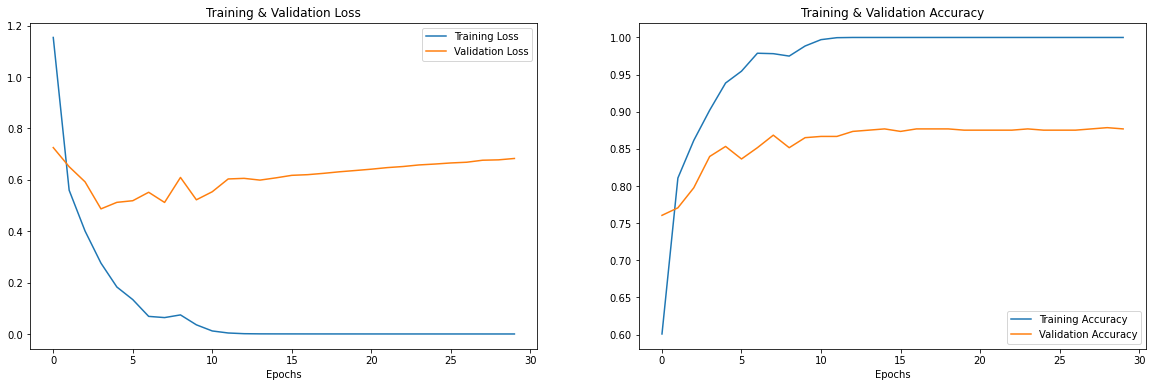

In [ ]:
epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']

test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

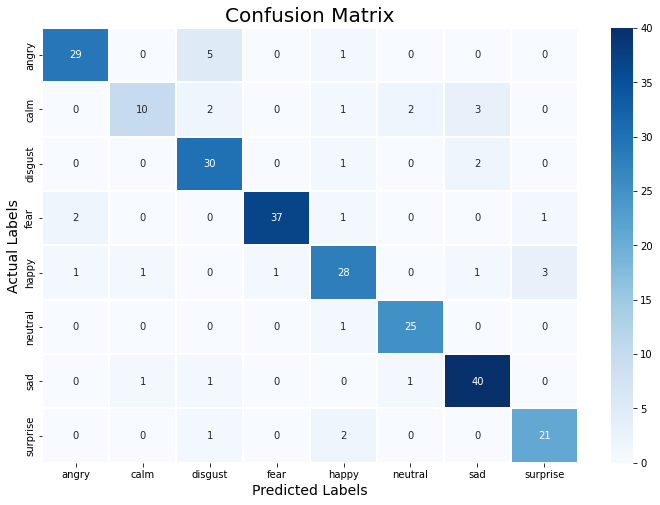

              precision    recall  f1-score   support

       angry       0.91      0.83      0.87        35
        calm       0.83      0.56      0.67        18
     disgust       0.77      0.91      0.83        33
        fear       0.97      0.90      0.94        41
       happy       0.80      0.80      0.80        35
     neutral       0.89      0.96      0.93        26
         sad       0.87      0.93      0.90        43
    surprise       0.84      0.88      0.86        24

    accuracy                           0.86       255
   macro avg       0.86      0.85      0.85       255
weighted avg       0.87      0.86      0.86       255



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))

In [ ]:
history=model.fit(X_train, y_train, epochs=30,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=32)

Epoch 1/30
 97/106 [==========================>...] - ETA: 0s - loss: 1.0877 - accuracy: 0.6331
Epoch 1: val_accuracy improved from -inf to 0.77572, saving model to /content/drive/MyDrive/thesis/best_model/mymodel4.h5
106/106 [==============================] - 12s 20ms/step - loss: 1.0427 - accuracy: 0.6492 - val_loss: 0.6887 - val_accuracy: 0.7757
Epoch 2/30
105/106 [============================>.] - ETA: 0s - loss: 0.4778 - accuracy: 0.8390
Epoch 2: val_accuracy improved from 0.77572 to 0.81450, saving model to /content/drive/MyDrive/thesis/best_model/mymodel4.h5
106/106 [==============================] - 1s 7ms/step - loss: 0.4759 - accuracy: 0.8396 - val_loss: 0.6052 - val_accuracy: 0.8145
Epoch 3/30
101/106 [===========================>..] - ETA: 0s - loss: 0.3018 - accuracy: 0.8945
Epoch 3: val_accuracy improved from 0.81450 to 0.82125, saving model to /content/drive/MyDrive/thesis/best_model/mymodel4.h5
106/106 [==============================] - 1s 7ms/step - loss: 0.2980 - accu

In [ ]:
# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

8/8 [==============================] - 0s 17ms/step - loss: 0.4961 - accuracy: 0.8902
Accuracy of our model on test data :  89.01960849761963 %


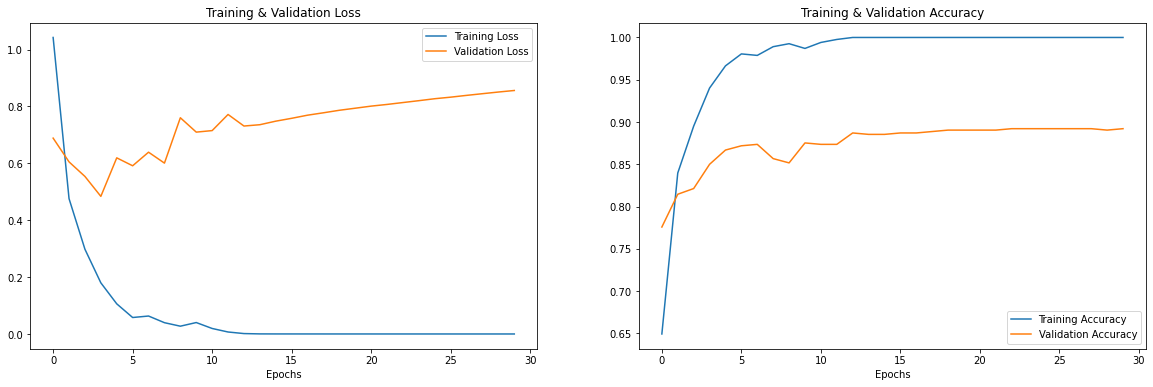

In [ ]:
epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']

test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

8/8 [==============================] - 0s 3ms/step


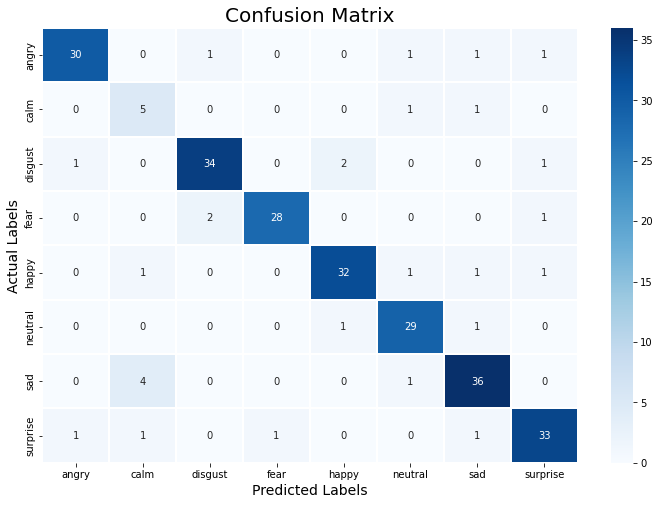

              precision    recall  f1-score   support

       angry       0.94      0.88      0.91        34
        calm       0.45      0.71      0.56         7
     disgust       0.92      0.89      0.91        38
        fear       0.97      0.90      0.93        31
       happy       0.91      0.89      0.90        36
     neutral       0.88      0.94      0.91        31
         sad       0.88      0.88      0.88        41
    surprise       0.89      0.89      0.89        37

    accuracy                           0.89       255
   macro avg       0.85      0.87      0.86       255
weighted avg       0.90      0.89      0.89       255



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))